**# Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**# Reading application_data**

In [ ]:
df = pd.read_csv("application_data.csv")

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**# Checking number of columns and rows**

In [ ]:
df.shape

(29114, 122)

In [ ]:
df.info('all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29114 entries, 0 to 29113
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    float64
 18   DAYS

In [ ]:
null_val = df.isnull().mean() *100

In [ ]:
null_val

,0
SK_ID_CURR,0.0000
TARGET,0.0000
NAME_CONTRACT_TYPE,0.0000
CODE_GENDER,0.0000
FLAG_OWN_CAR,0.0000
...,...
AMT_REQ_CREDIT_BUREAU_DAY,13.4334
AMT_REQ_CREDIT_BUREAU_WEEK,13.4334
AMT_REQ_CREDIT_BUREAU_MON,13.4334
AMT_REQ_CREDIT_BUREAU_QRT,13.4334


**# Finding the columns which are having null values more than 40%**

In [ ]:
col_null = df.isnull().sum()
col_null= col_null[col_null>0.4*(len(col_null))]
len(col_null)

63

**# Dropping the columns with null values more than 40%**

In [ ]:

col_null = list(col_null[col_null.values>=0.4].index)
df.drop(labels= col_null,axis =1, inplace= True)

**# Checking the percentage of null values present after dropping**

In [ ]:
df.isnull().sum()/len(df)*100

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.000000


# Checking for the null values of column

In [ ]:
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


**# Treatment of AMT_ANNUITY null values**

<Axes: ylabel='AMT_ANNUITY'>

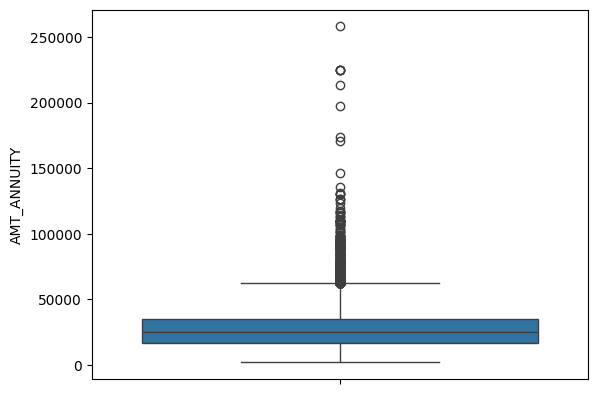

In [ ]:
sns.boxplot(df['AMT_ANNUITY'])

In [ ]:
null_treatment = df['AMT_ANNUITY'].median()
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = null_treatment

# Checking the null values list again for verification of treatment

In [ ]:
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


**# Removing rows having null values greater than or equal to 40%**

In [ ]:
emptyrow = df.isnull().sum(axis=1)
emptyrow = list(emptyrow[emptyrow.values>=0.4*len(df)].index)
df.drop(labels=emptyrow, axis=0,inplace=True)
print(len(emptyrow))

0


**# Removing unwanted columns from dataset**

In [ ]:

unwant_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwant_col,axis=1, inplace=True)

# let's find these categorical columns having these 'XNA' values
    
# For Gender column **bold text**

In [ ]:
df[df['CODE_GENDER']=='XNA'].shape

(0, 29)

**# For Organization column**

In [ ]:
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(5244, 29)

**# Describing the Gender column to check the number of females and males**

In [ ]:
df['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,19156
M,9958


**# Updating the column 'CODE_GENDER' with "F" for the dataset**

In [ ]:
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,19156
M,9958


**# Describing the organization type column**

In [ ]:
df['ORGANIZATION_TYPE'].describe()

,ORGANIZATION_TYPE
count,29113
unique,58
top,Business Entity Type 3
freq,6338


**# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column**

In [ ]:
df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 29)

**# Casting all variable into numeric in the dataset**

In [ ]:
numeric_columns = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,Religion


# Creating bins for income amount

In [ ]:

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

# Creating bins for Credit amount
**bold text**

In [ ]:

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

In [ ]:

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

# Calculating Imbalance percentage
# Since the majority is target0 and minority is target1

In [ ]:
round(len(target0_df)/len(target1_df),2)

10.75

# Count plotting in logarithmic scale

In [ ]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='YlOrRd_r')

    plt.show()

# PLotting for income range

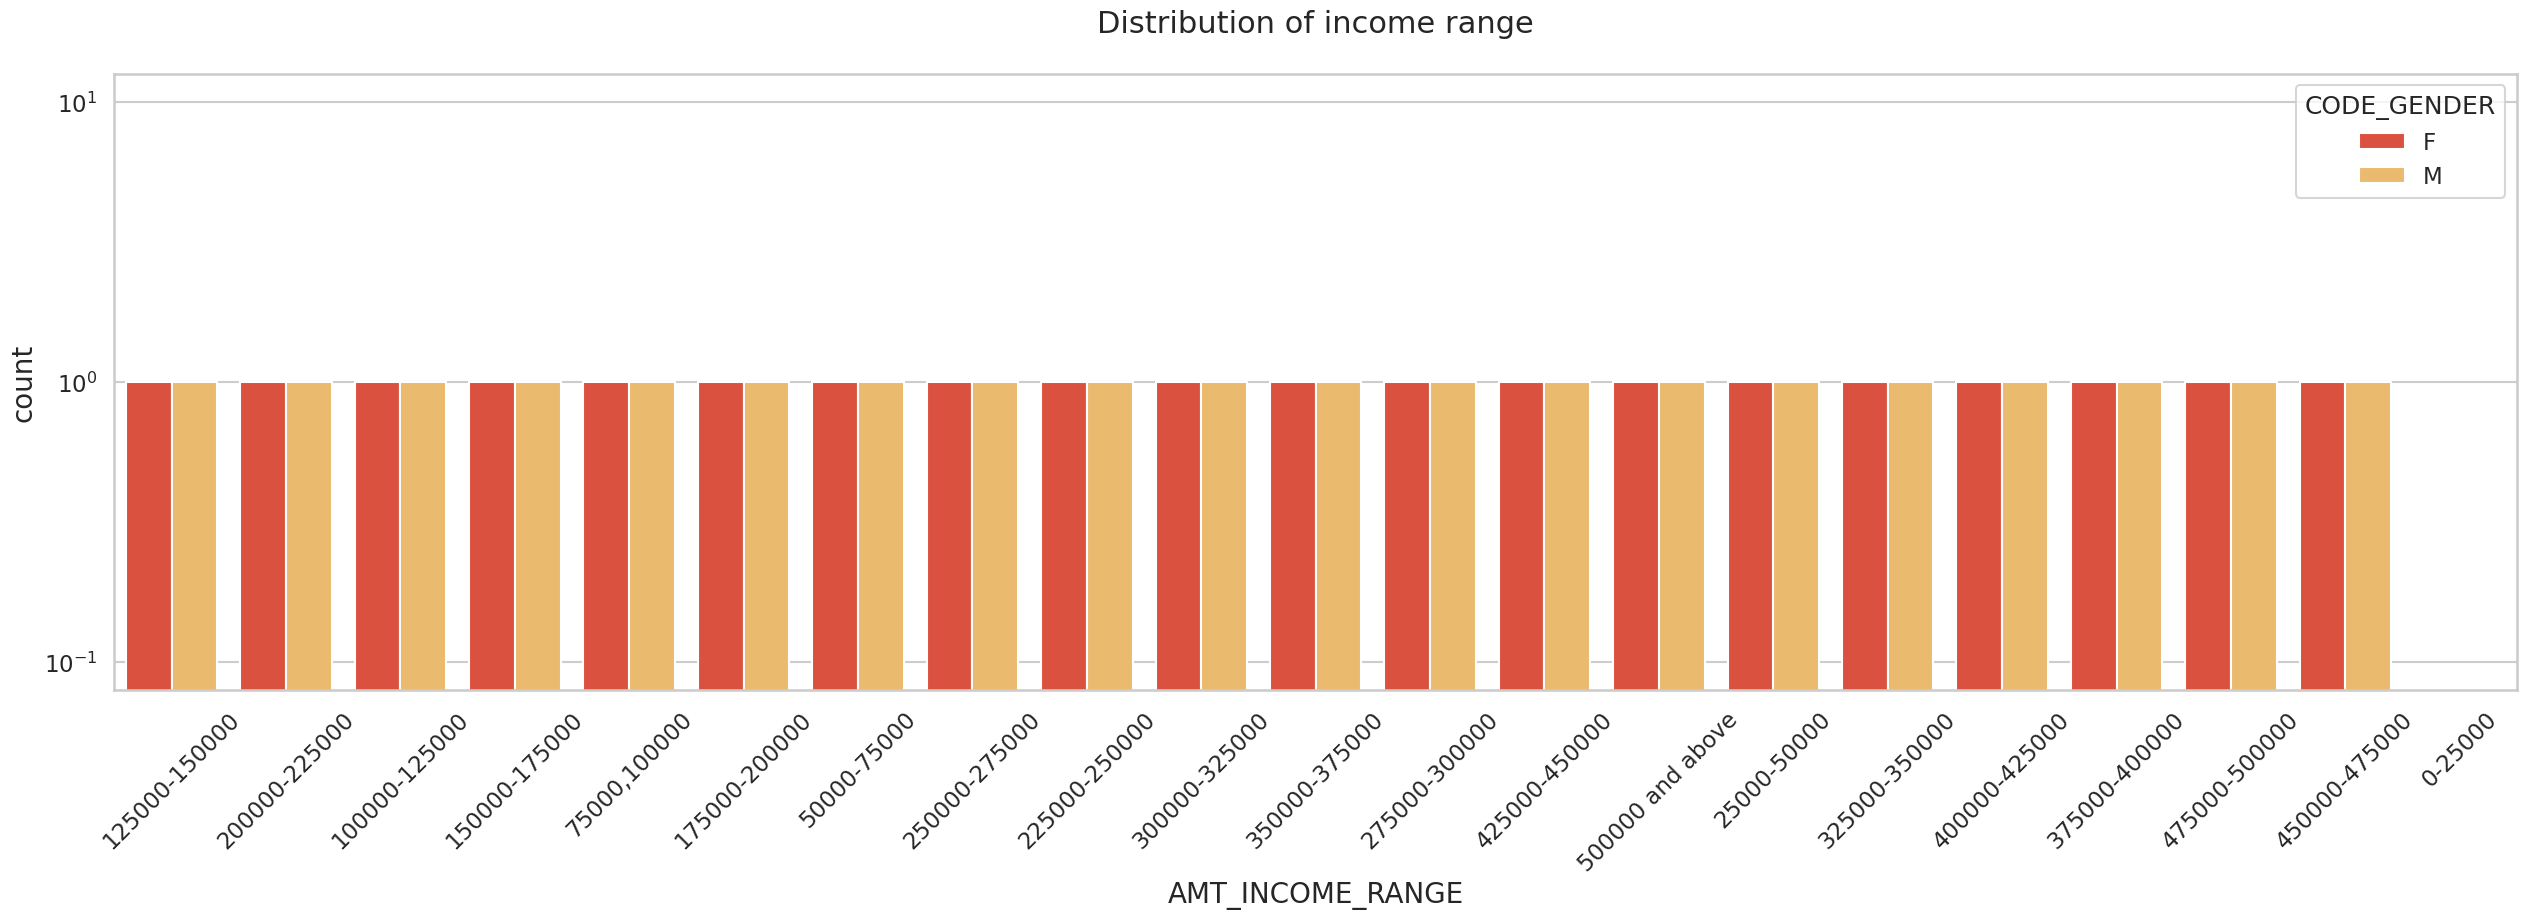

In [ ]:
uniplot(target0_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

# Plotting for Income type

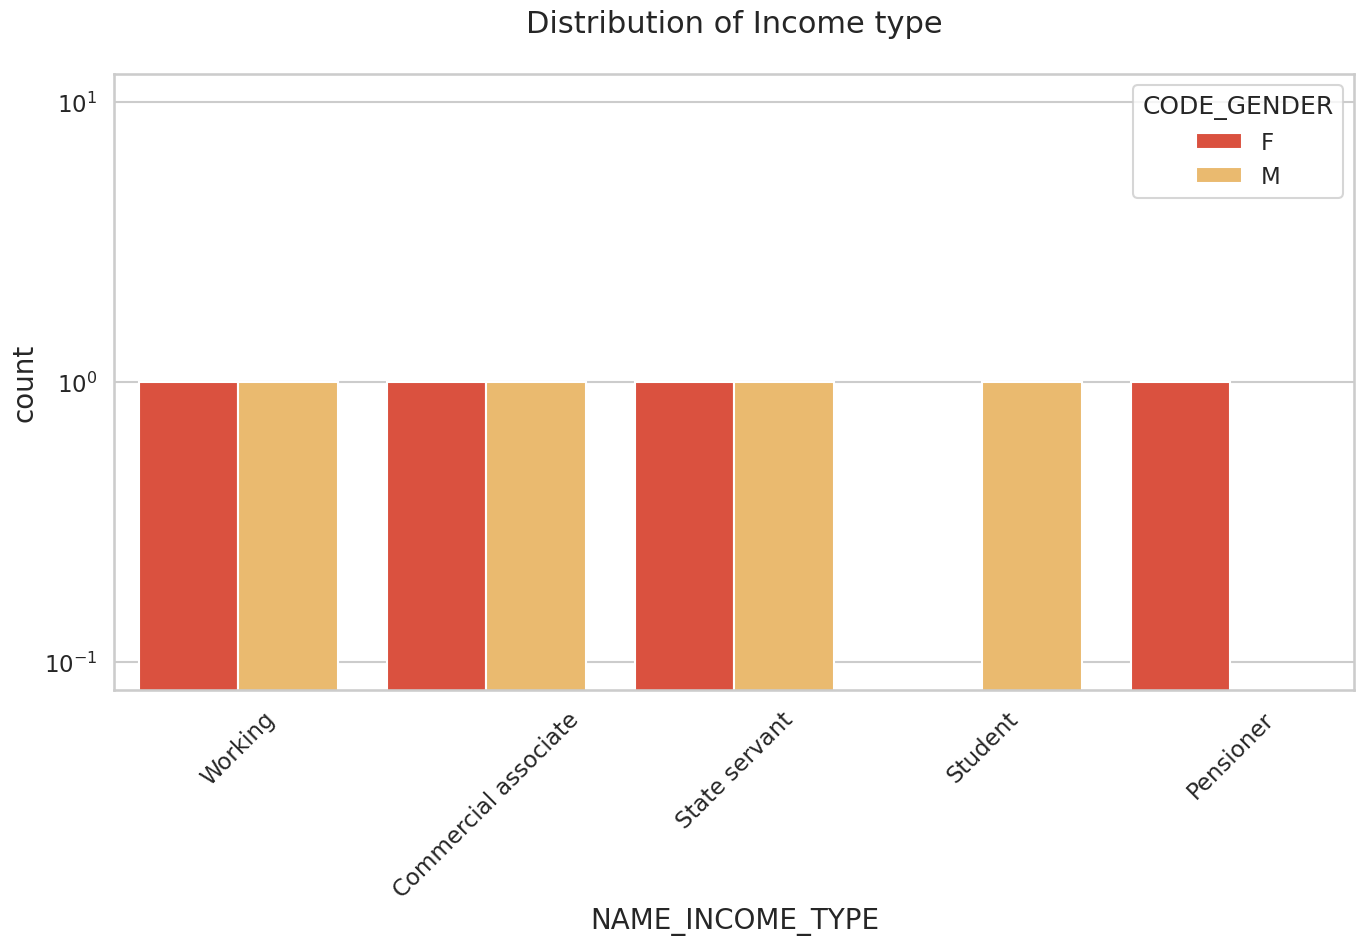

In [ ]:
uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

# Plotting for Contract type

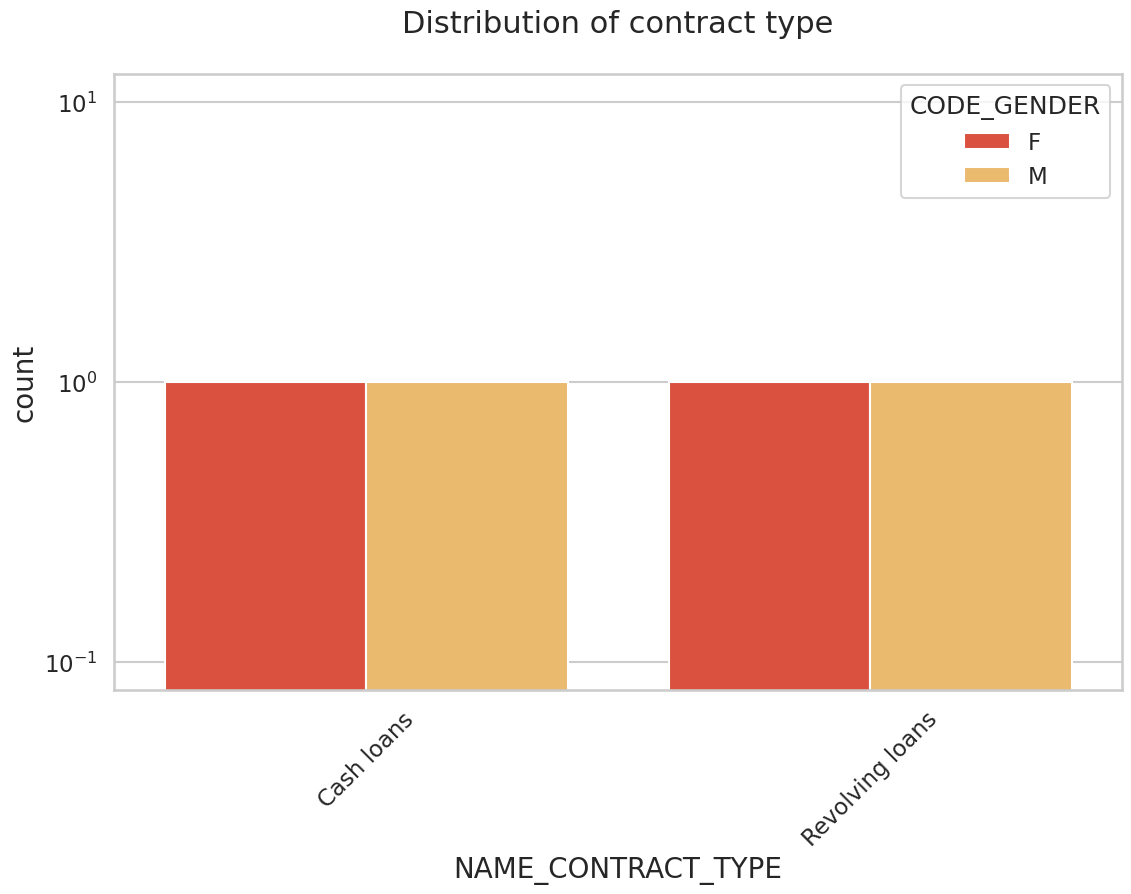

In [ ]:
uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

# Plotting for Organization type in logarithmic scale

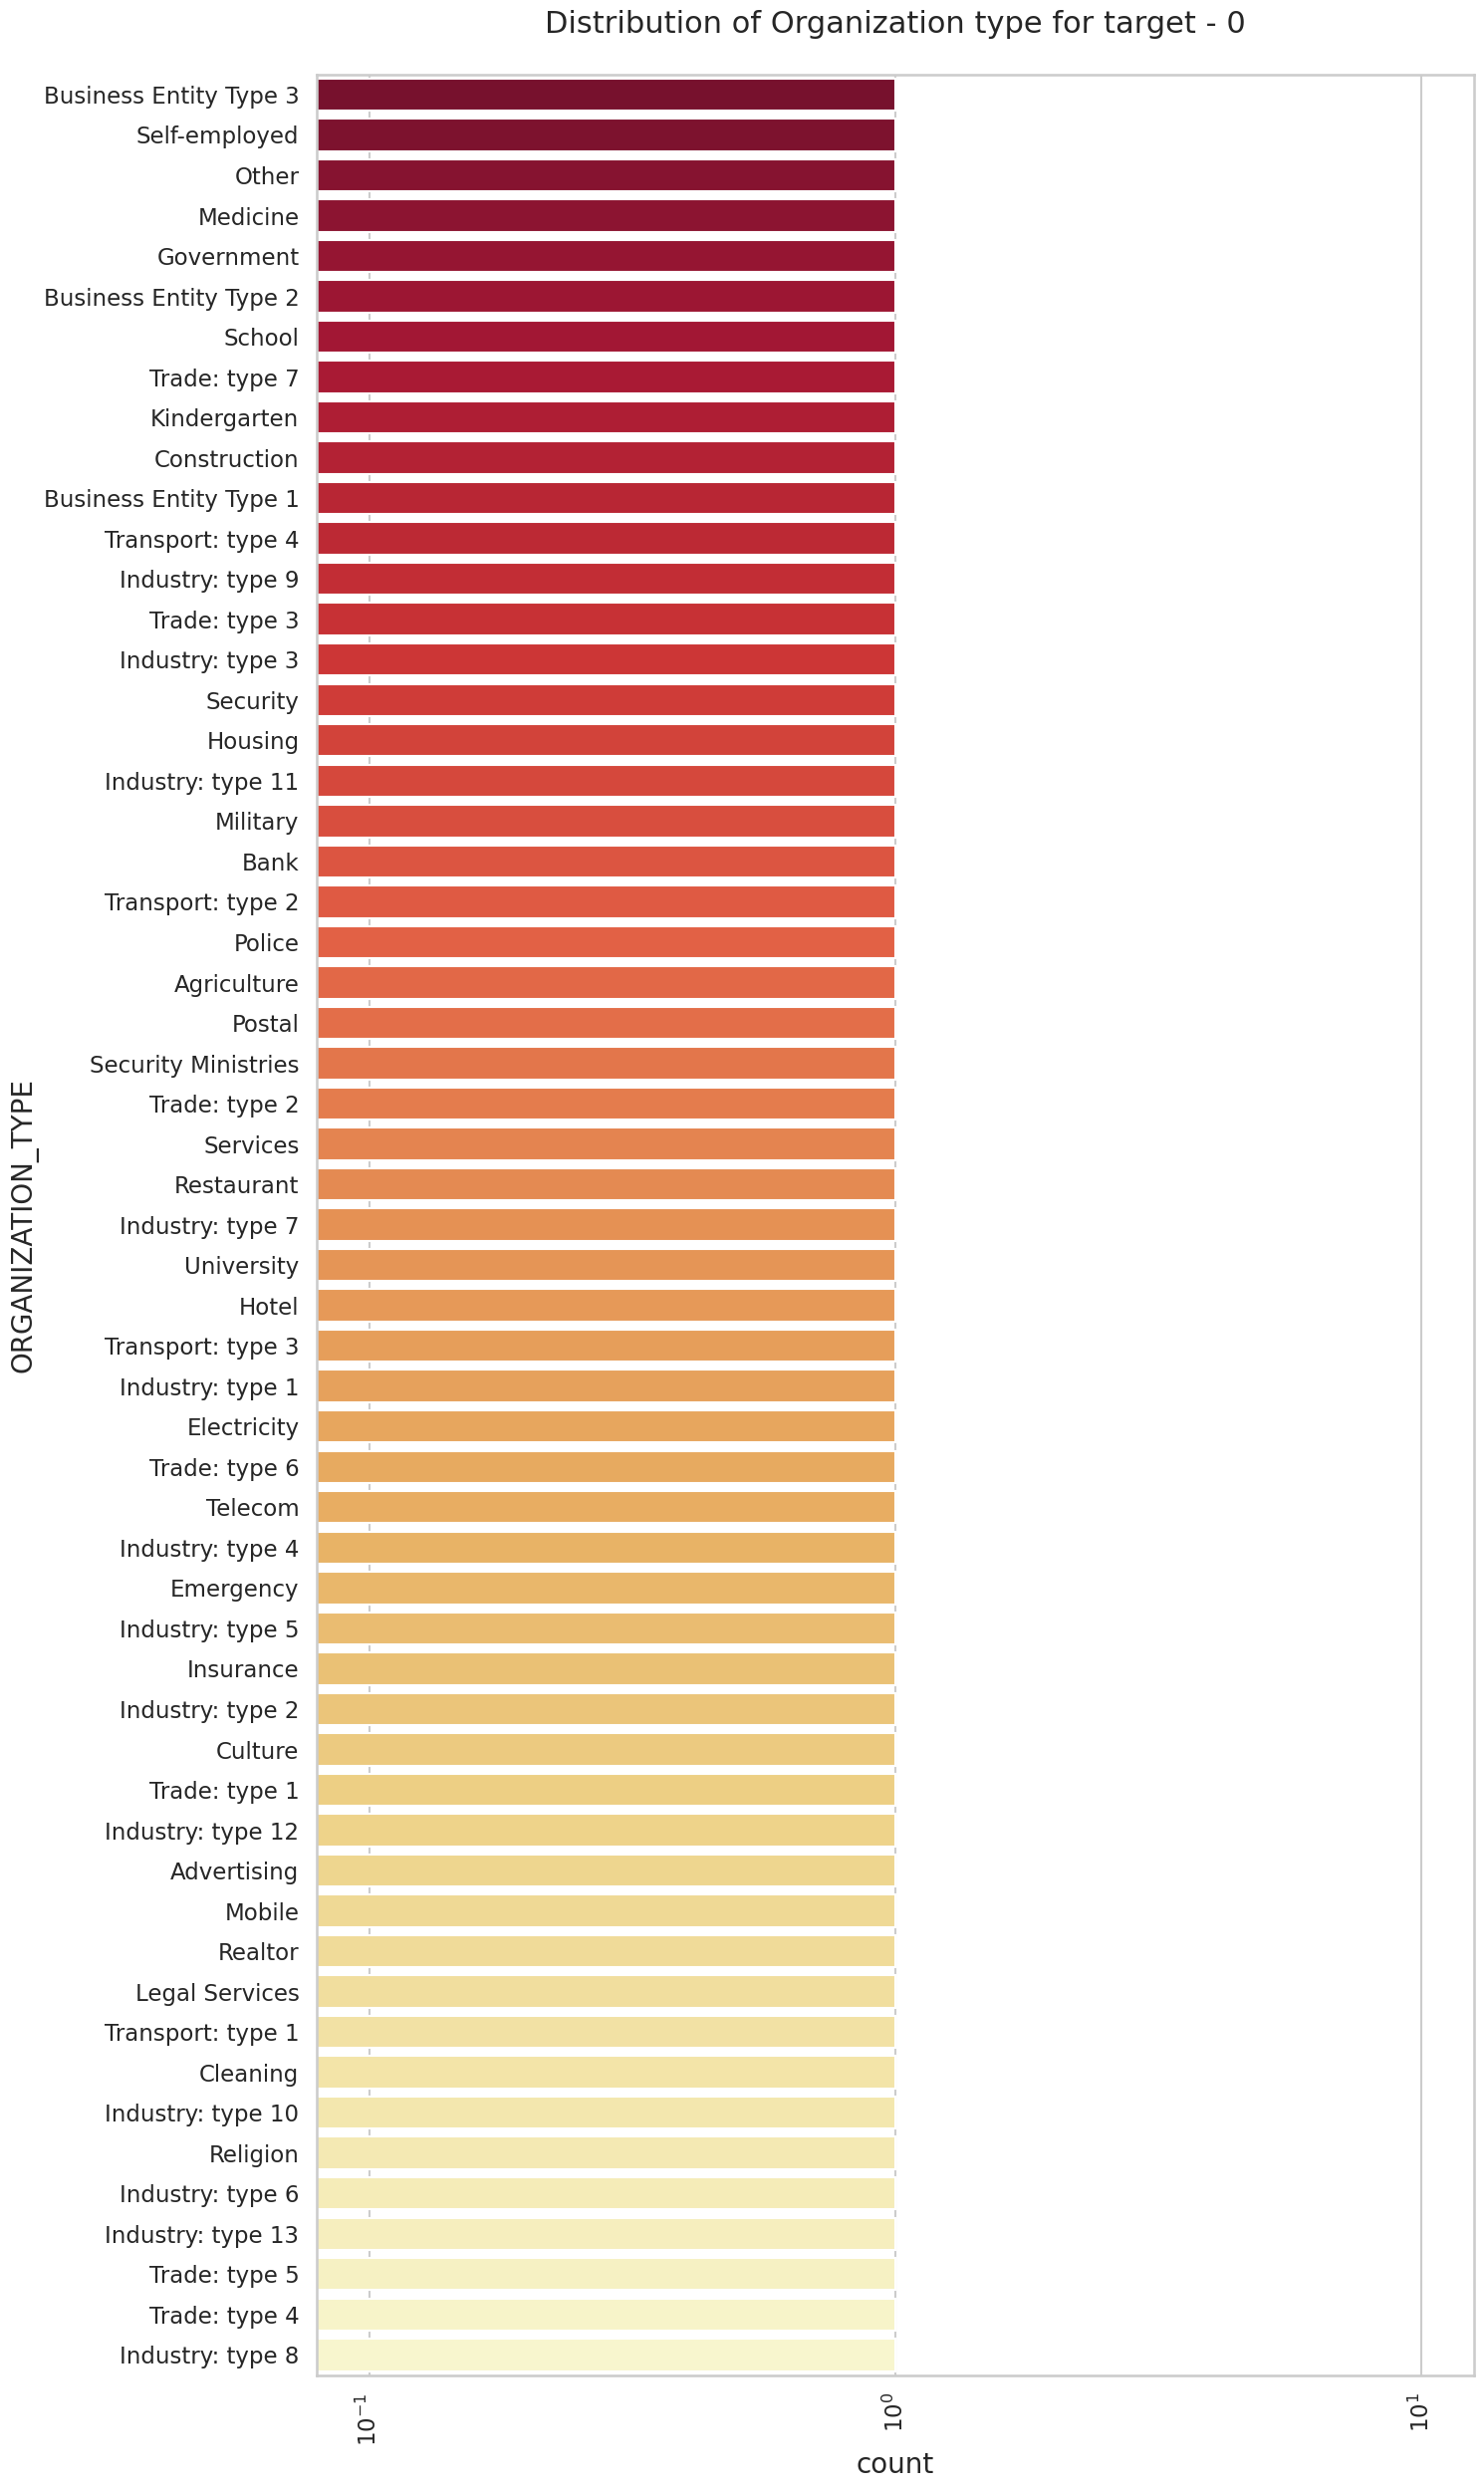

In [ ]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='YlOrRd_r')

plt.show()

# PLotting for income range

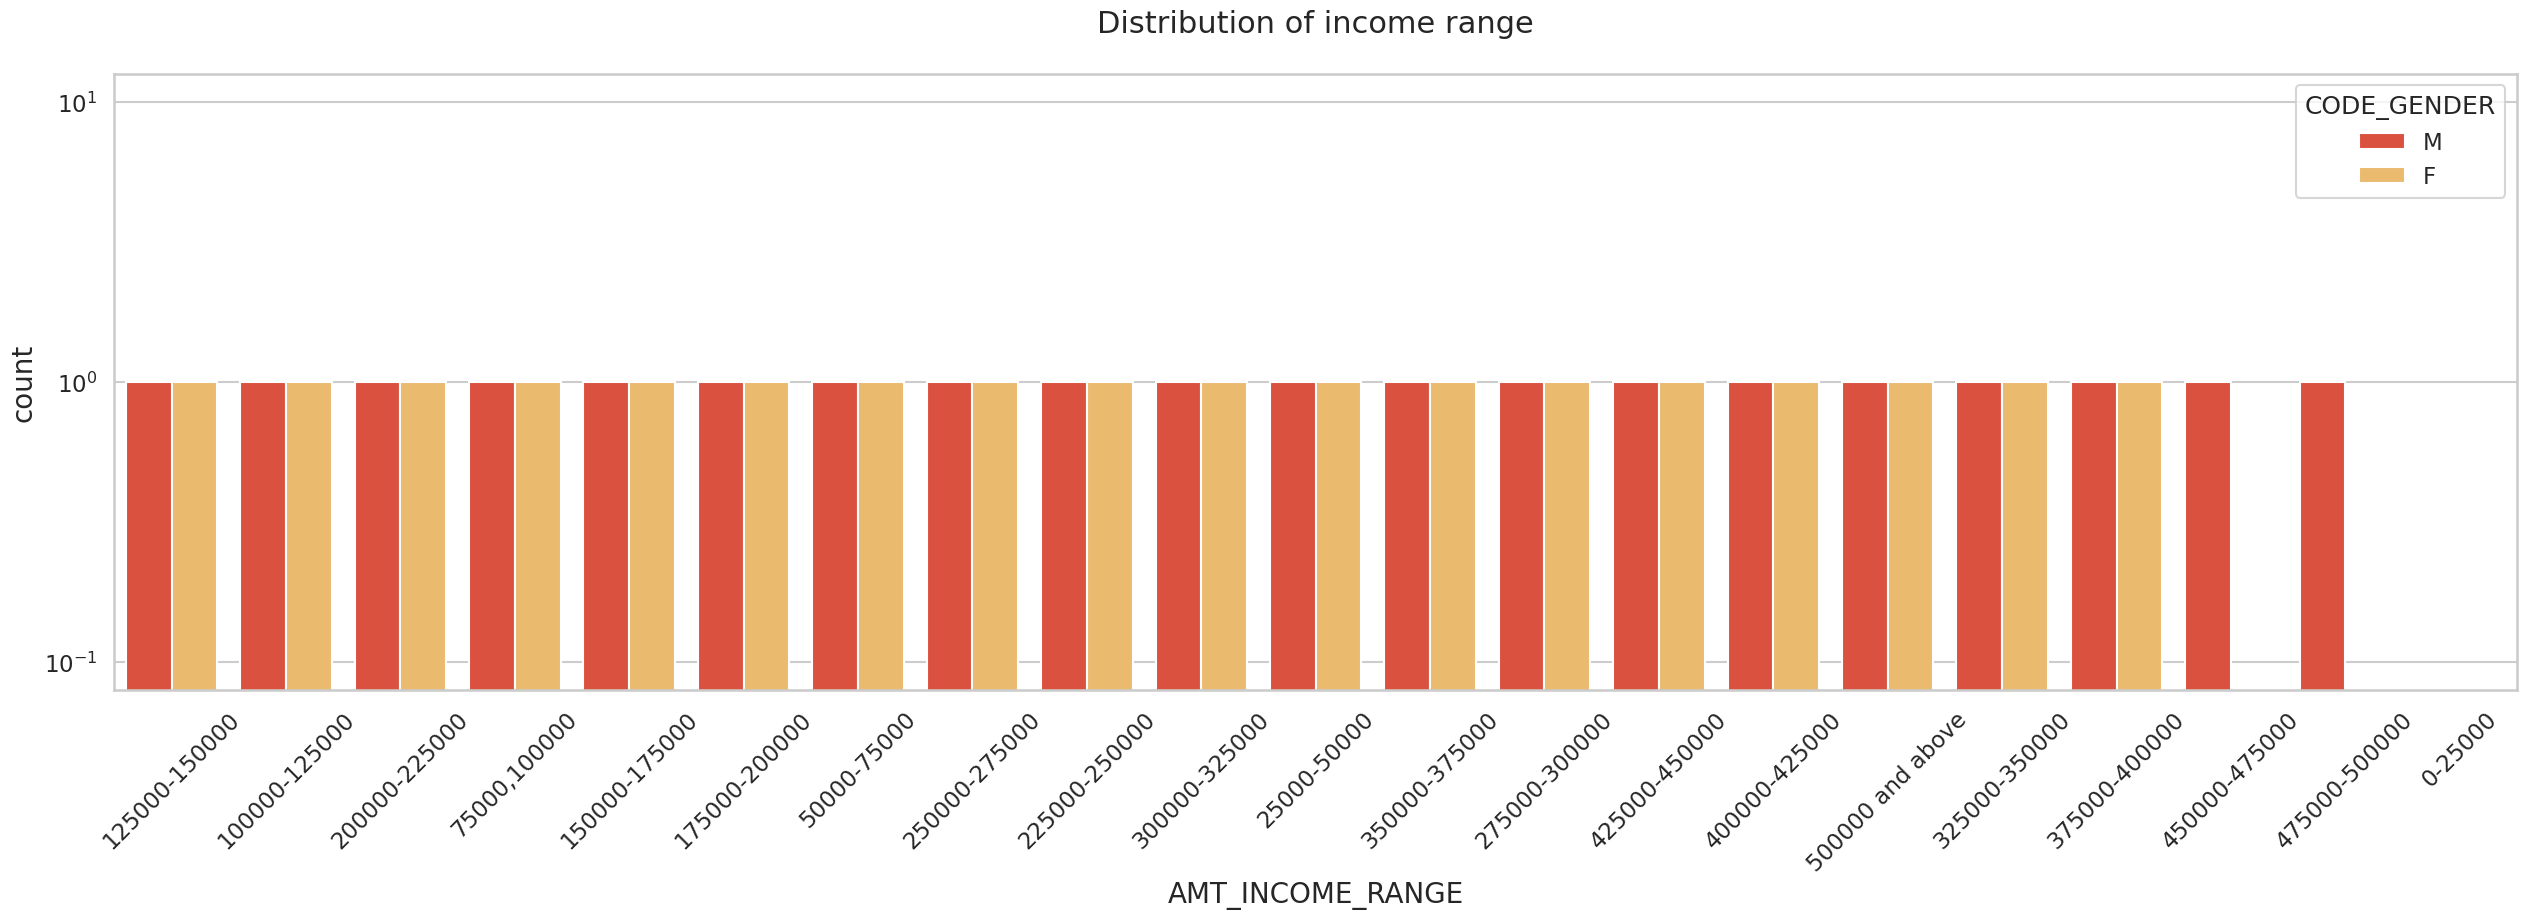

In [ ]:
uniplot(target1_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

# Plotting for Income type

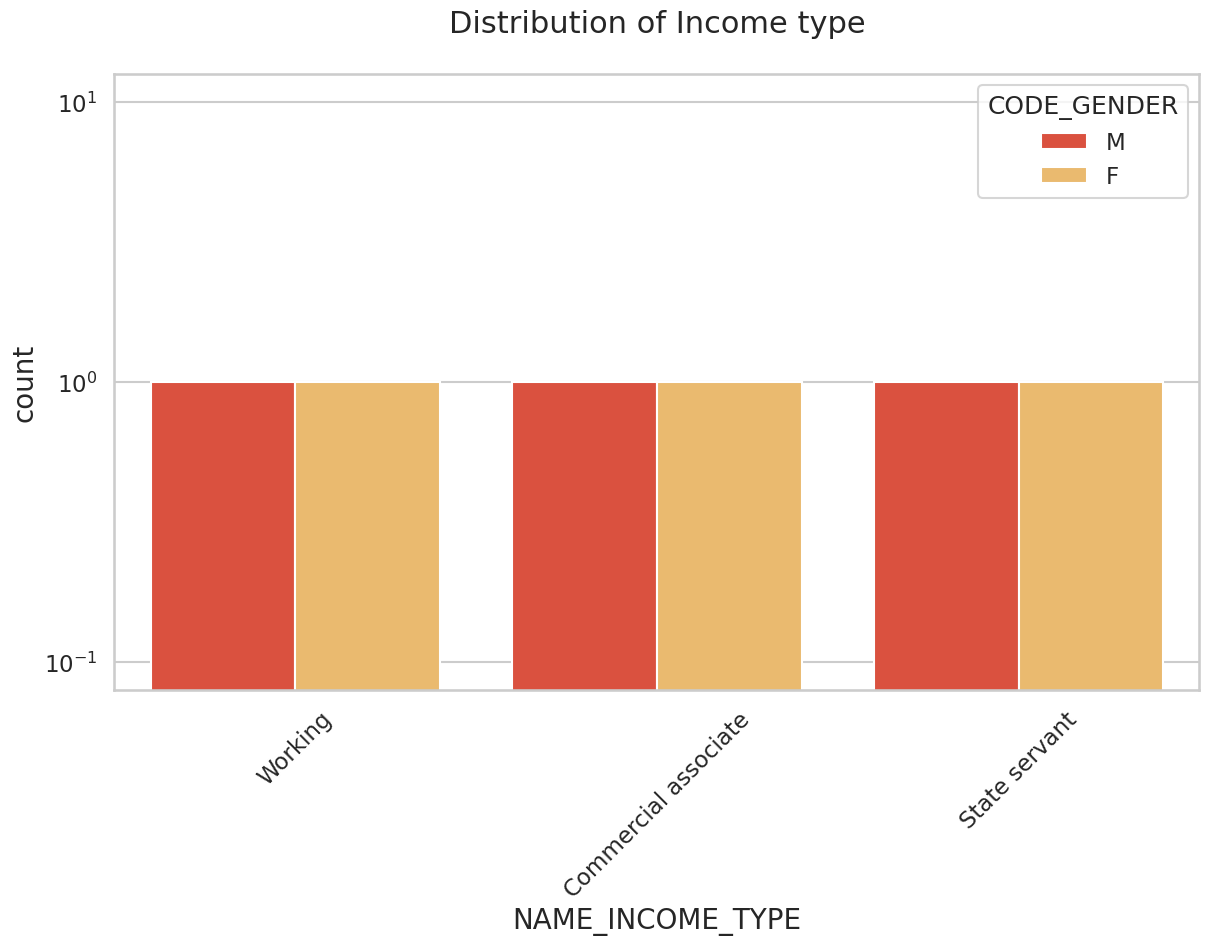

In [ ]:
uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

# Plotting for Contract type

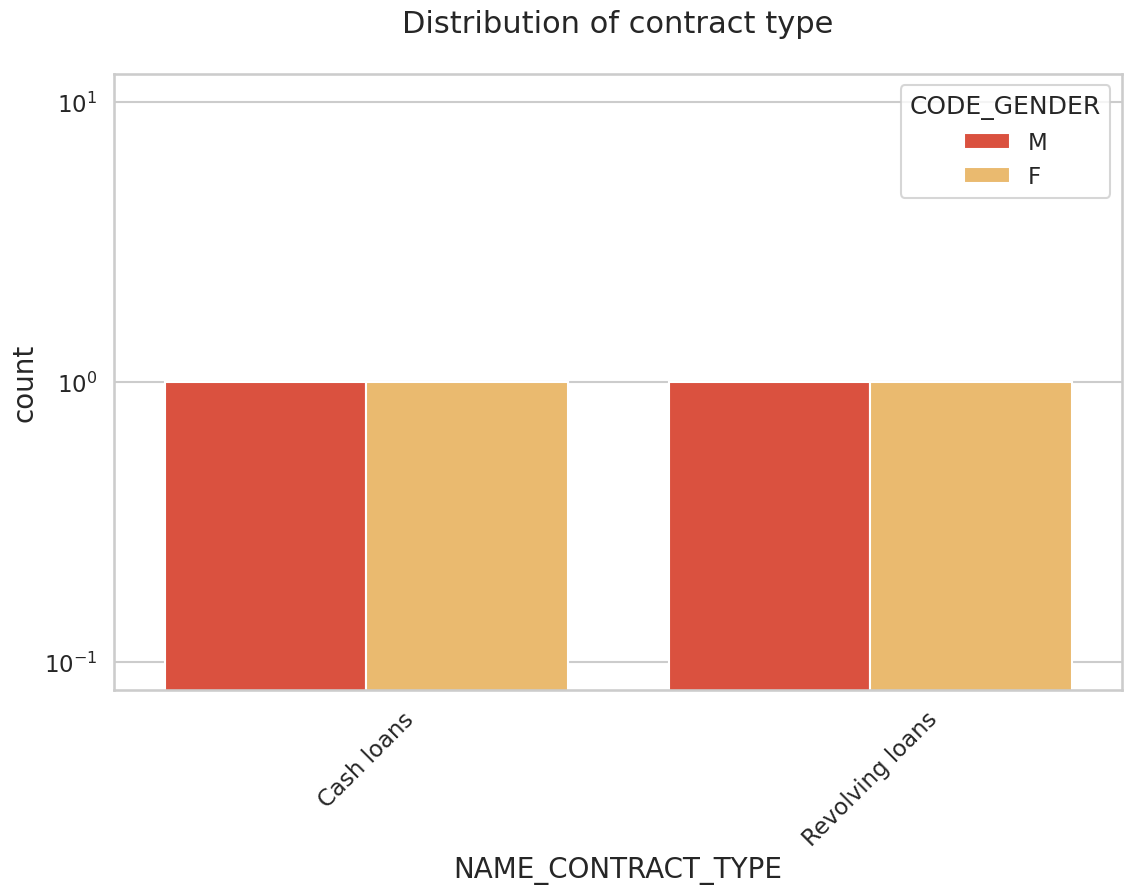

In [ ]:
uniplot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

# Plotting for Organization type

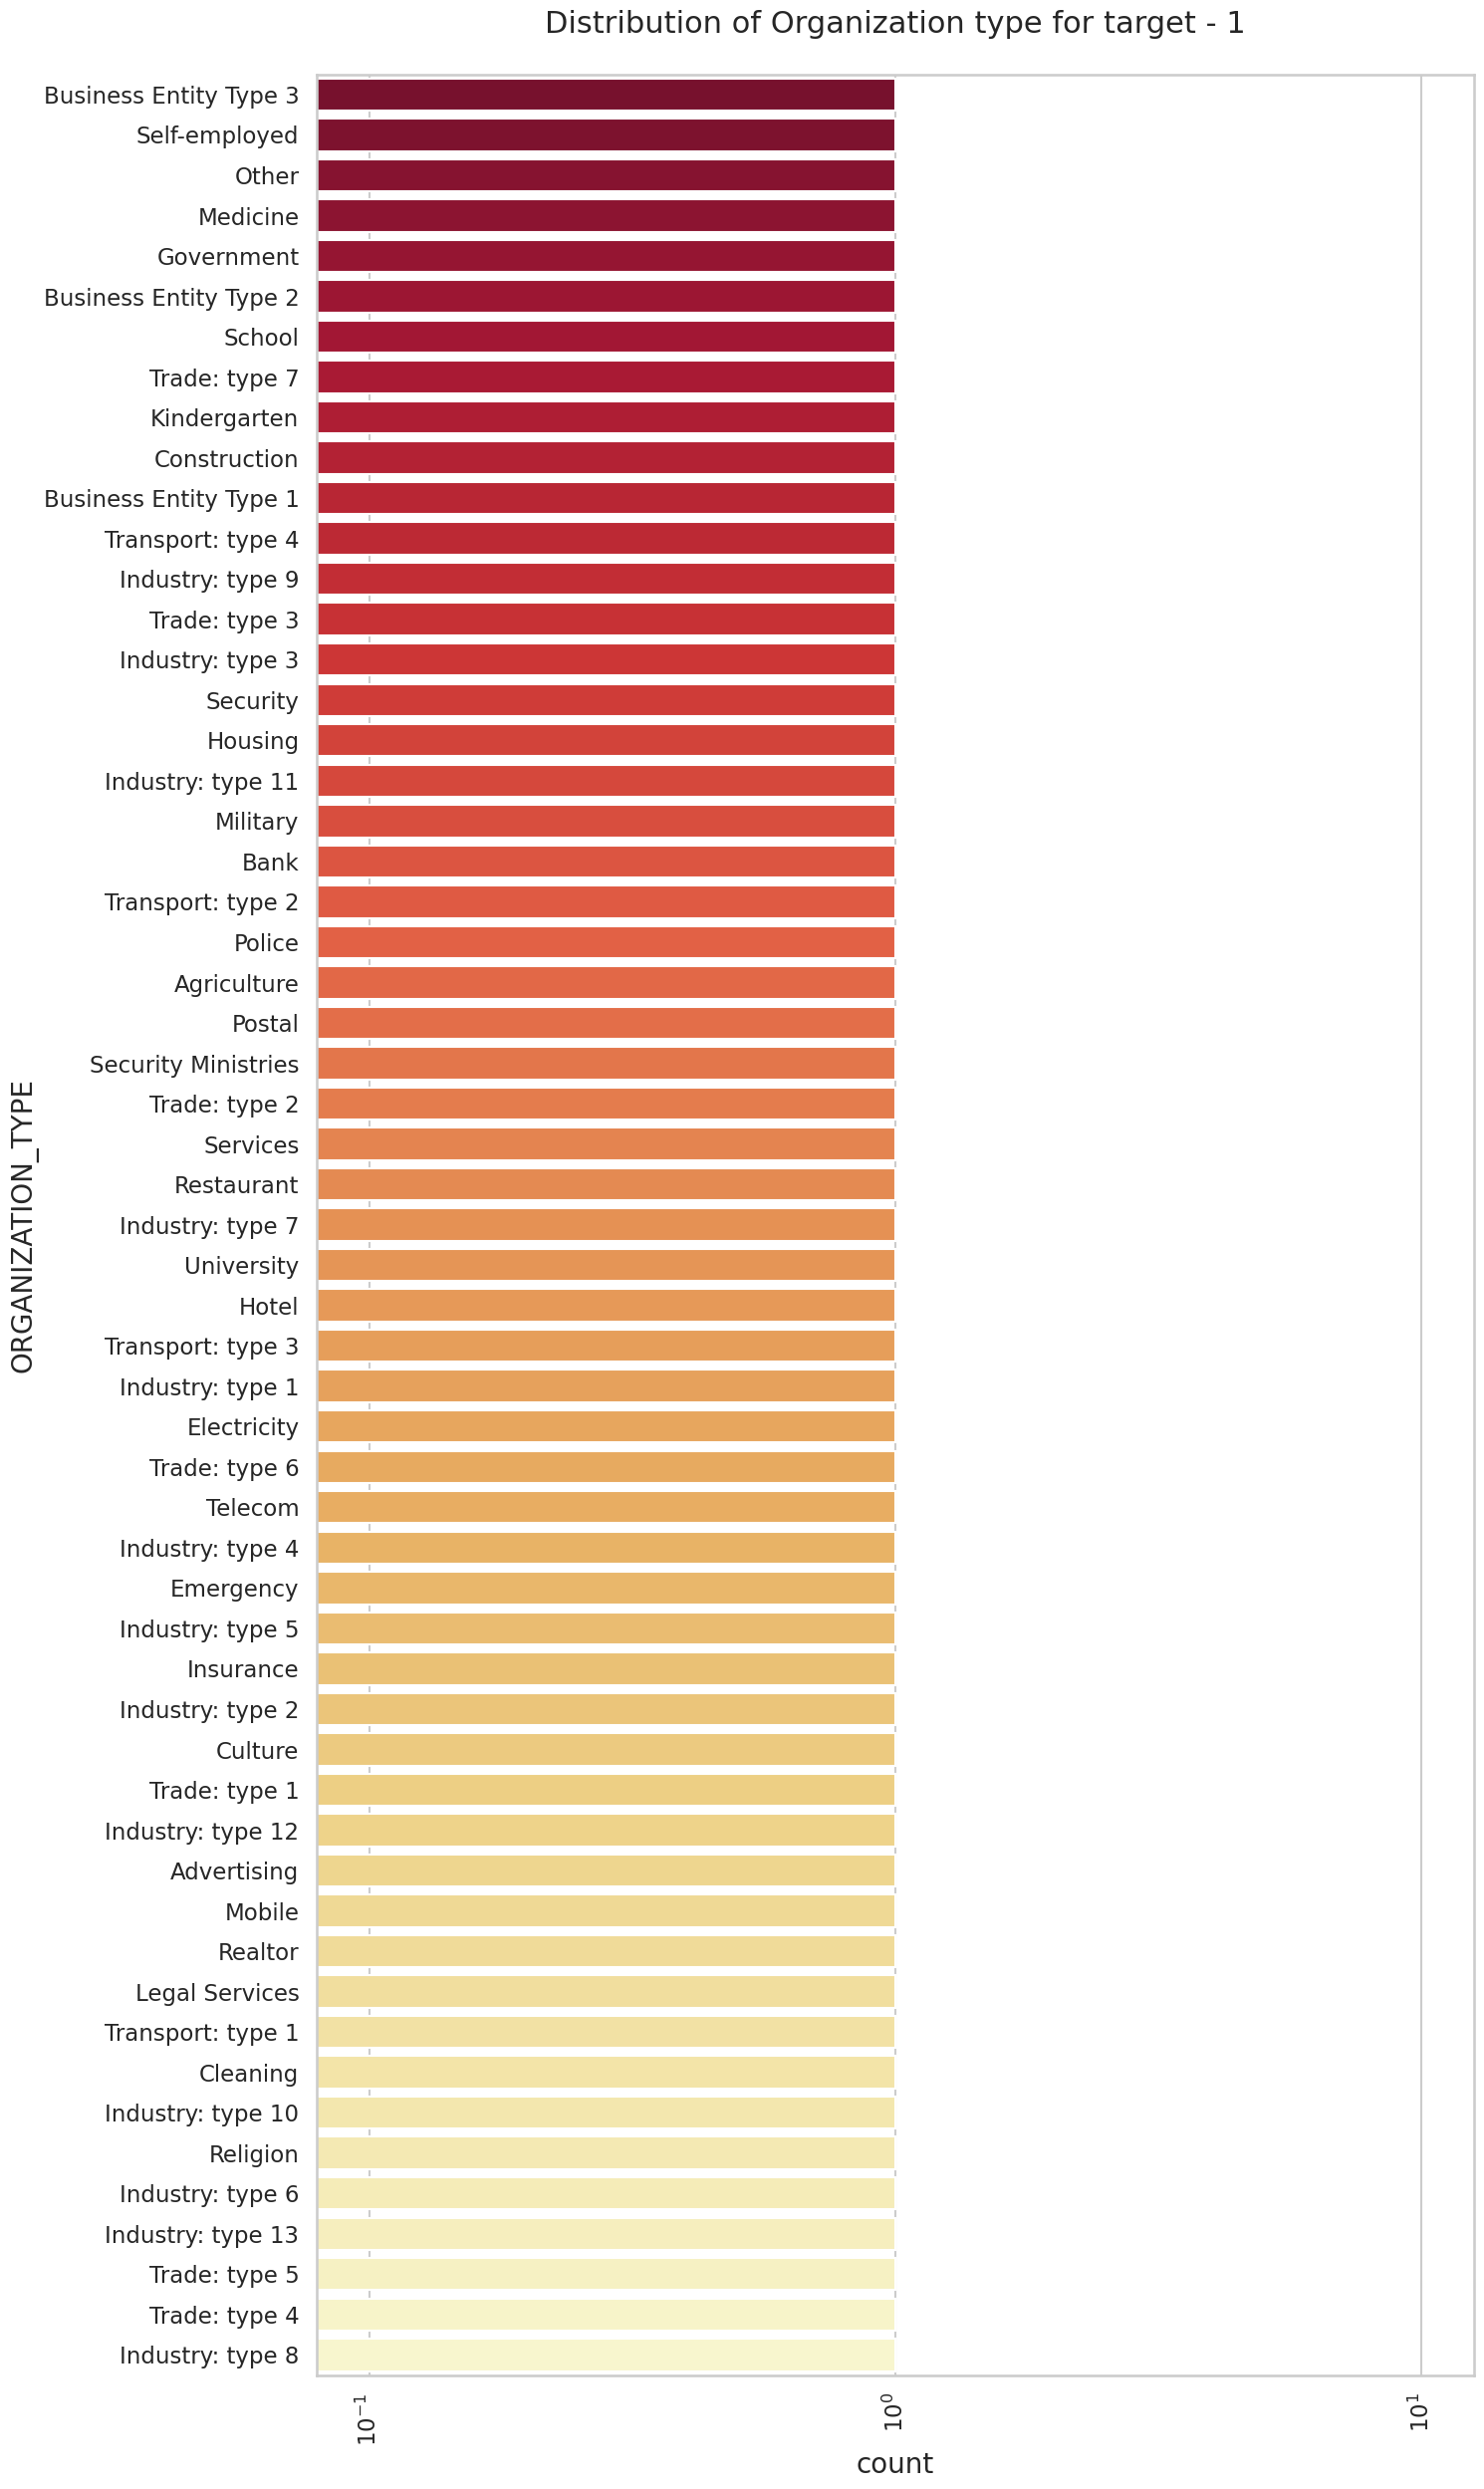

In [ ]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='YlOrRd_r')

plt.show()

# Finding some correlation for numerical columns for both target 0 and 1

In [ ]:
target0_corr=target0_df.select_dtypes(include=np.number).iloc[0:,2:] # Select only numeric columns
target1_corr=target1_df.select_dtypes(include=np.number).iloc[0:,2:] # Select only numeric columns

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

# Correlation for target 0

In [ ]:
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.012244,-0.016451,-0.001542,-0.021572,-0.030077,0.272896,0.044829,0.157641,-0.124009,-0.025979,-0.025468,-0.021758,-0.008852,0.002910,0.005016,0.007699
AMT_INCOME_TOTAL,-0.012244,1.000000,0.407301,0.475042,0.412164,0.101253,-0.042621,-0.054811,0.024943,-0.032742,0.075724,0.076486,0.156307,0.142568,0.001768,-0.013143,-0.009187
AMT_CREDIT,-0.016451,0.407301,1.000000,0.829086,0.985202,0.056975,-0.170752,-0.095708,-0.019967,-0.041412,0.043377,0.022332,0.049770,0.049874,-0.032276,-0.034451,-0.009665
AMT_ANNUITY,-0.001542,0.475042,0.829086,1.000000,0.826556,0.062261,-0.102471,-0.067782,0.002630,-0.032436,0.034892,0.036318,0.079210,0.074740,-0.016428,-0.023298,-0.009322
AMT_GOODS_PRICE,-0.021572,0.412164,0.985202,0.826556,1.000000,0.066395,-0.172433,-0.100364,-0.019139,-0.042019,0.050674,0.025215,0.051950,0.050838,-0.032721,-0.036339,-0.012189
REGION_POPULATION_RELATIVE,-0.030077,0.101253,0.056975,0.062261,0.066395,1.000000,-0.052154,-0.010712,-0.053721,-0.008126,0.127075,-0.027454,0.033302,0.054992,-0.049129,-0.037944,-0.007359
DAYS_BIRTH,0.272896,-0.042621,-0.170752,-0.102471,-0.172433,-0.052154,1.000000,0.307368,0.271654,0.081169,0.042848,0.050737,0.039260,0.014710,0.176141,0.108383,0.016615
DAYS_EMPLOYED,0.044829,-0.054811,-0.095708,-0.067782,-0.100364,-0.010712,0.307368,1.000000,0.129364,0.103865,0.026264,0.061769,0.085641,0.059720,0.123312,0.123959,0.061058
DAYS_REGISTRATION,0.157641,0.024943,-0.019967,0.002630,-0.019139,-0.053721,0.271654,0.129364,1.000000,0.045578,-0.025985,0.015245,0.008355,-0.003608,0.041646,0.045894,0.020385
DAYS_ID_PUBLISH,-0.124009,-0.032742,-0.041412,-0.032436,-0.042019,-0.008126,0.081169,0.103865,0.045578,1.000000,0.006229,0.023430,0.019161,0.004669,0.054205,0.034642,0.001851


# Correlation for target 1

In [ ]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.062122,0.024106,0.025763,0.015839,-0.007960,0.154611,-0.016177,0.124358,-0.094608,-0.046871,-0.040787,-0.019083,0.002505,-0.033942,0.007937,0.038240
AMT_INCOME_TOTAL,-0.062122,1.000000,0.356587,0.430216,0.355338,0.056471,-0.128630,-0.047401,-0.027461,-0.050833,0.066606,0.094993,0.146578,0.133711,0.017749,-0.010292,-0.014574
AMT_CREDIT,0.024106,0.356587,1.000000,0.815587,0.975798,0.021190,-0.226666,-0.154734,-0.051150,-0.050056,0.046837,0.004457,0.021054,0.030903,-0.041797,-0.033091,-0.002843
AMT_ANNUITY,0.025763,0.430216,0.815587,1.000000,0.808027,0.016232,-0.120129,-0.097495,-0.021348,-0.042950,0.039879,0.028255,0.060236,0.066982,-0.017561,-0.008562,0.013513
AMT_GOODS_PRICE,0.015839,0.355338,0.975798,0.808027,1.000000,0.038586,-0.218263,-0.162141,-0.055278,-0.062754,0.058329,0.001956,0.021999,0.030581,-0.047539,-0.039564,-0.006621
REGION_POPULATION_RELATIVE,-0.007960,0.056471,0.021190,0.016232,0.038586,1.000000,0.003089,0.011465,0.003613,-0.002775,0.139249,-0.005938,-0.010234,0.014352,-0.029655,-0.023677,-0.006981
DAYS_BIRTH,0.154611,-0.128630,-0.226666,-0.120129,-0.218263,0.003089,1.000000,0.257137,0.190794,0.145739,0.026217,0.029275,0.043806,0.027170,0.119208,0.099662,0.031178
DAYS_EMPLOYED,-0.016177,-0.047401,-0.154734,-0.097495,-0.162141,0.011465,0.257137,1.000000,0.071356,0.117679,-0.034504,0.029997,0.080935,0.064585,0.105691,0.147117,0.094094
DAYS_REGISTRATION,0.124358,-0.027461,-0.051150,-0.021348,-0.055278,0.003613,0.190794,0.071356,1.000000,0.056476,-0.067361,-0.021129,-0.028306,-0.015393,0.001742,0.023465,0.018782
DAYS_ID_PUBLISH,-0.094608,-0.050833,-0.050056,-0.042950,-0.062754,-0.002775,0.145739,0.117679,0.056476,1.000000,0.021869,0.011848,0.016617,0.014640,0.058486,0.012759,-0.025852


# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

In [ ]:
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

# For Target 0

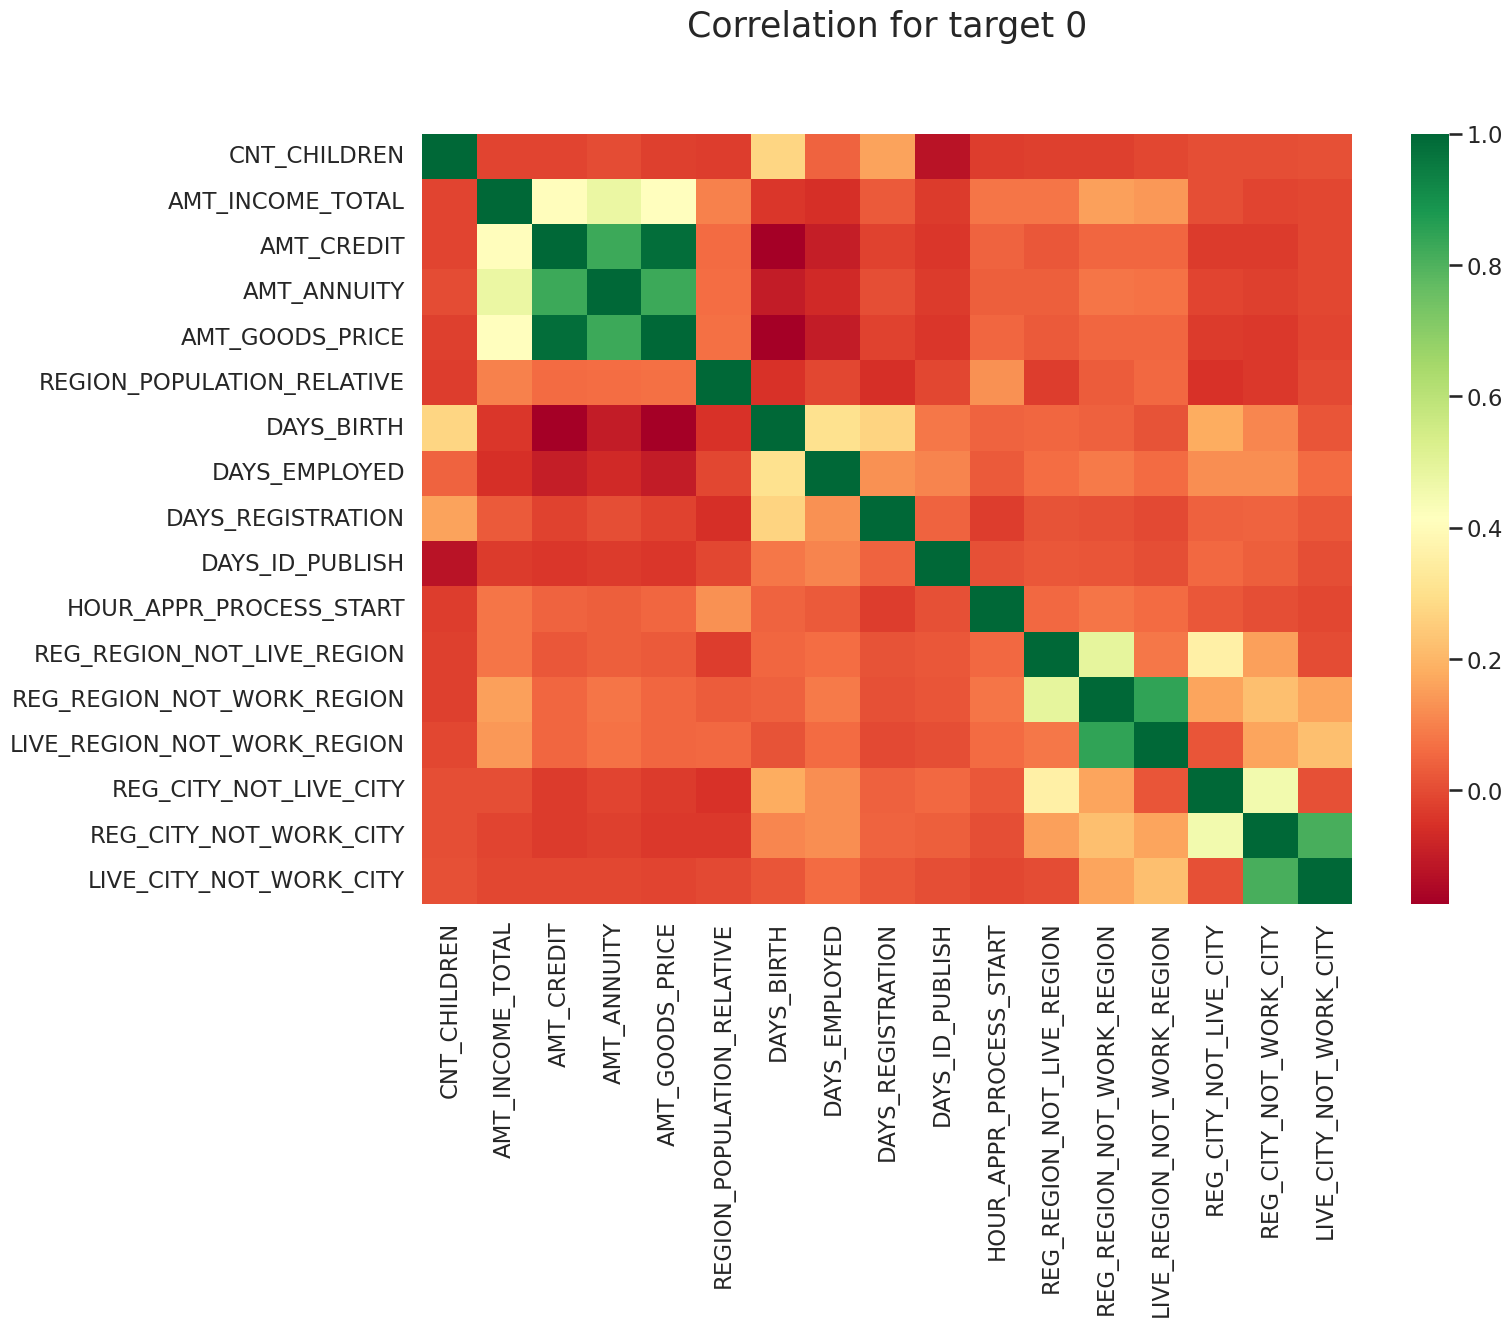

In [ ]:
targets_corr(data=target0,title='Correlation for target 0')


# For Target 1


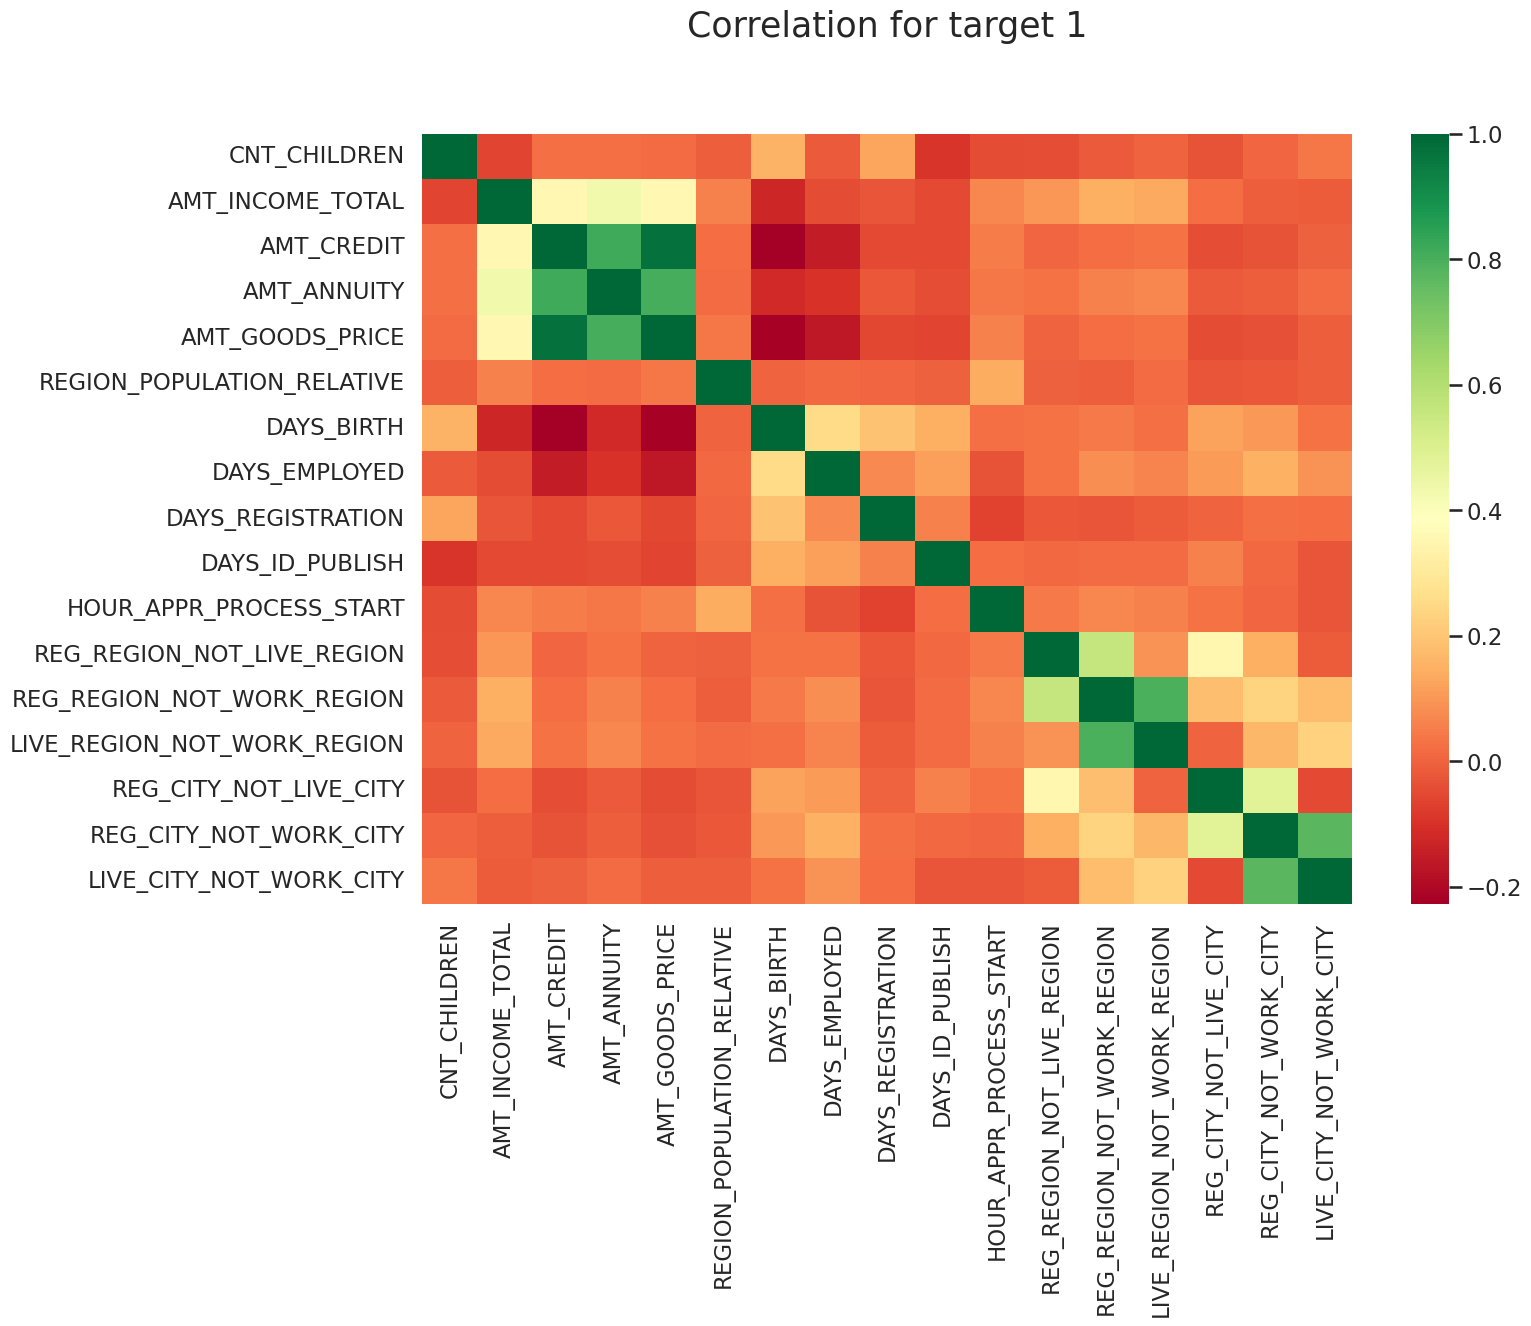

In [ ]:
targets_corr(data=target1,title='Correlation for target 1')

In [ ]:
def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1_df, y= col)
    plt.show()

# Distribution of income amount

In [ ]:
univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

# Disrtibution of credit amount

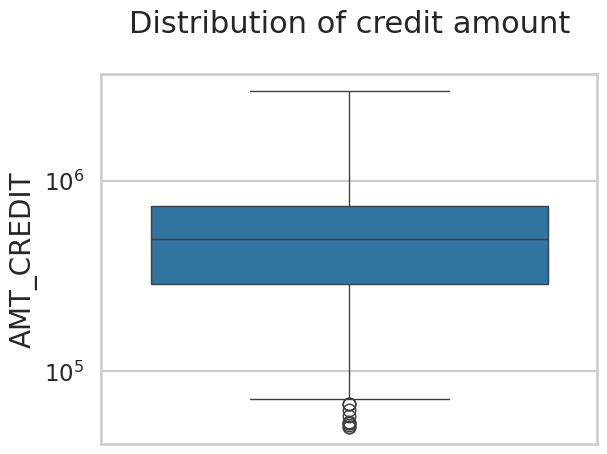

In [ ]:
univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of credit amount')

# Distribution of anuuity amount

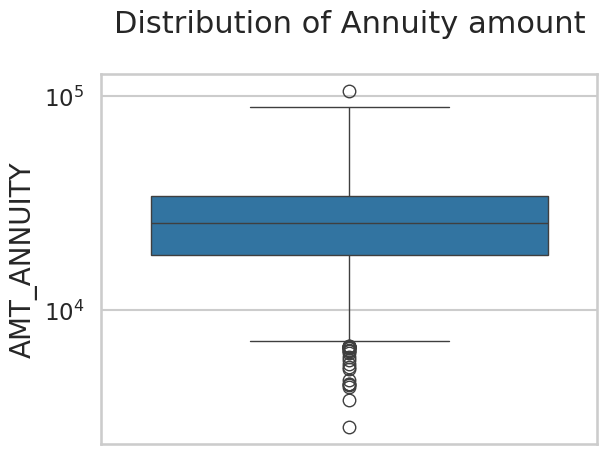

In [ ]:
univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

# Distribution of credit amount

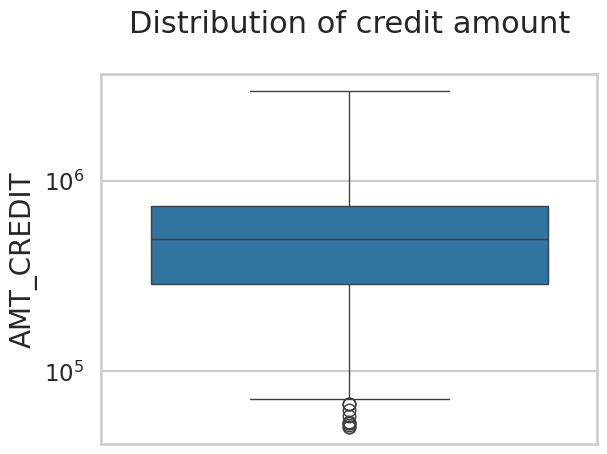

In [ ]:
univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of credit amount')

# Distribution of Annuity amount

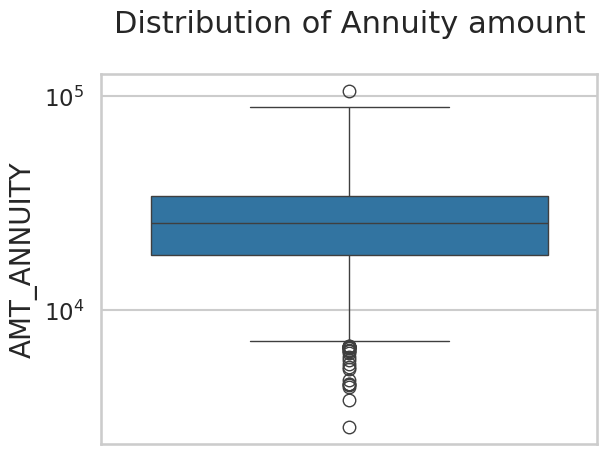

In [ ]:
univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

In [ ]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

# Box plotting for Income amount in logarithmic scale

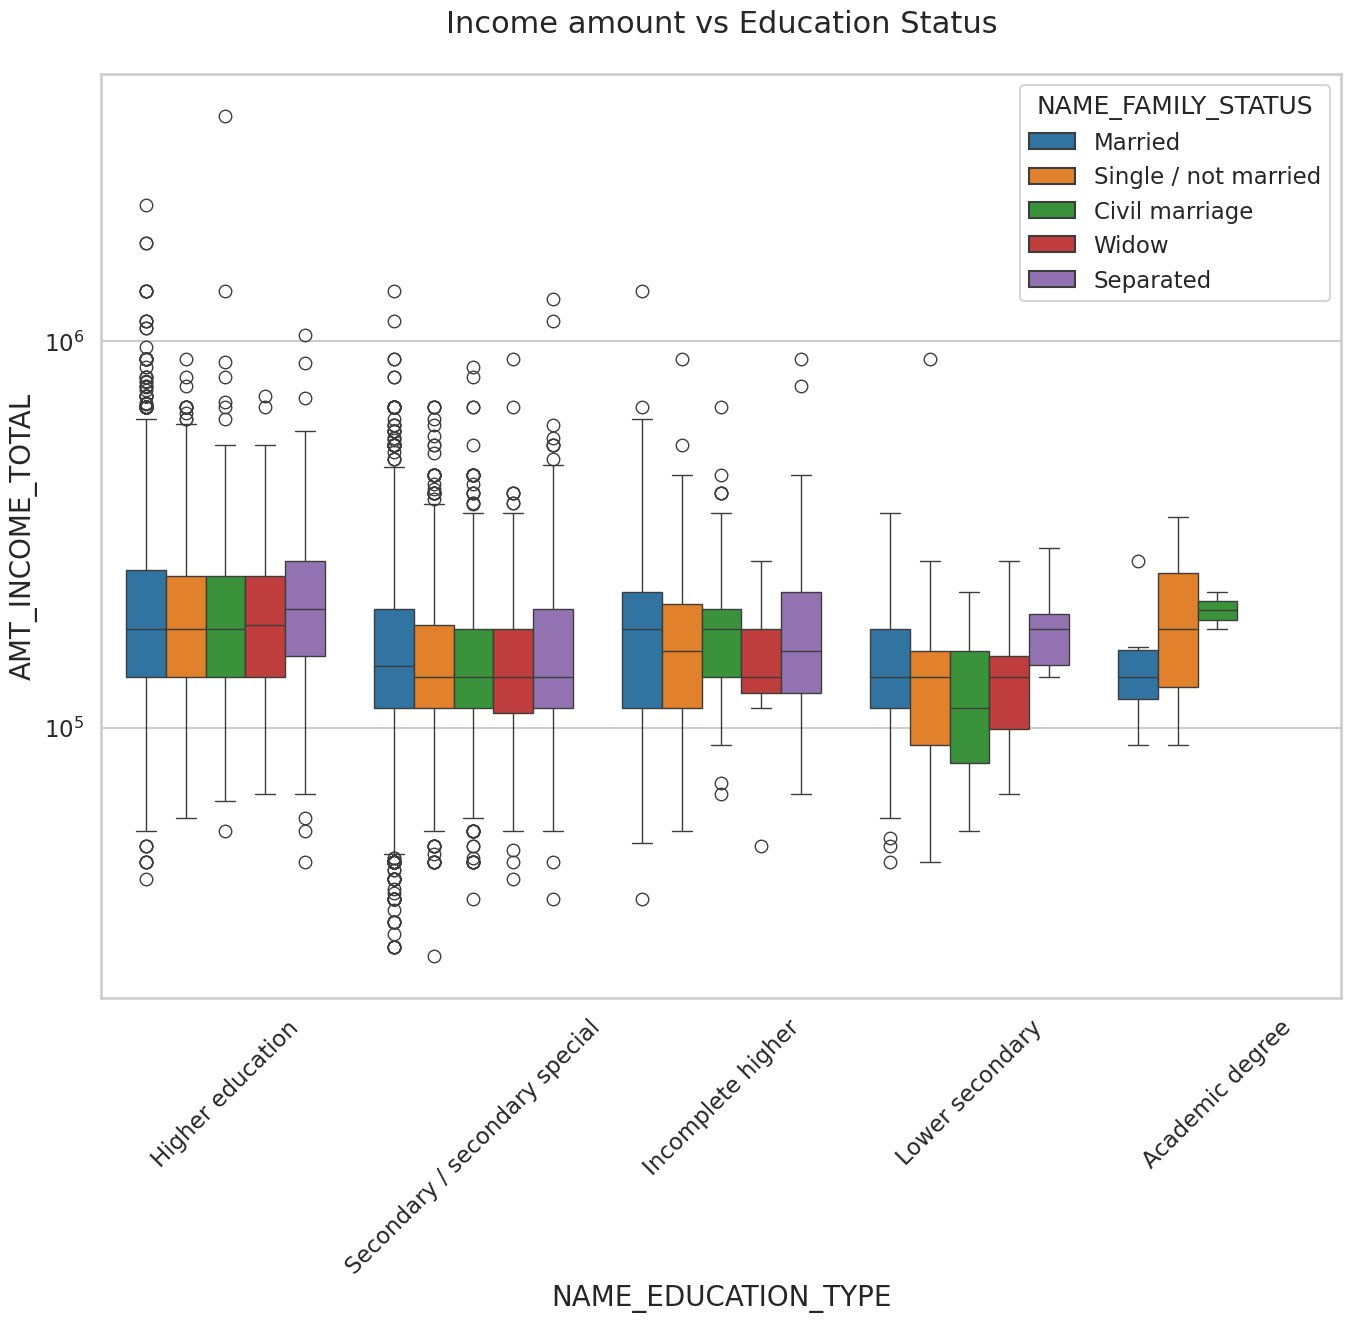

In [ ]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

# Box plotting for credit amount

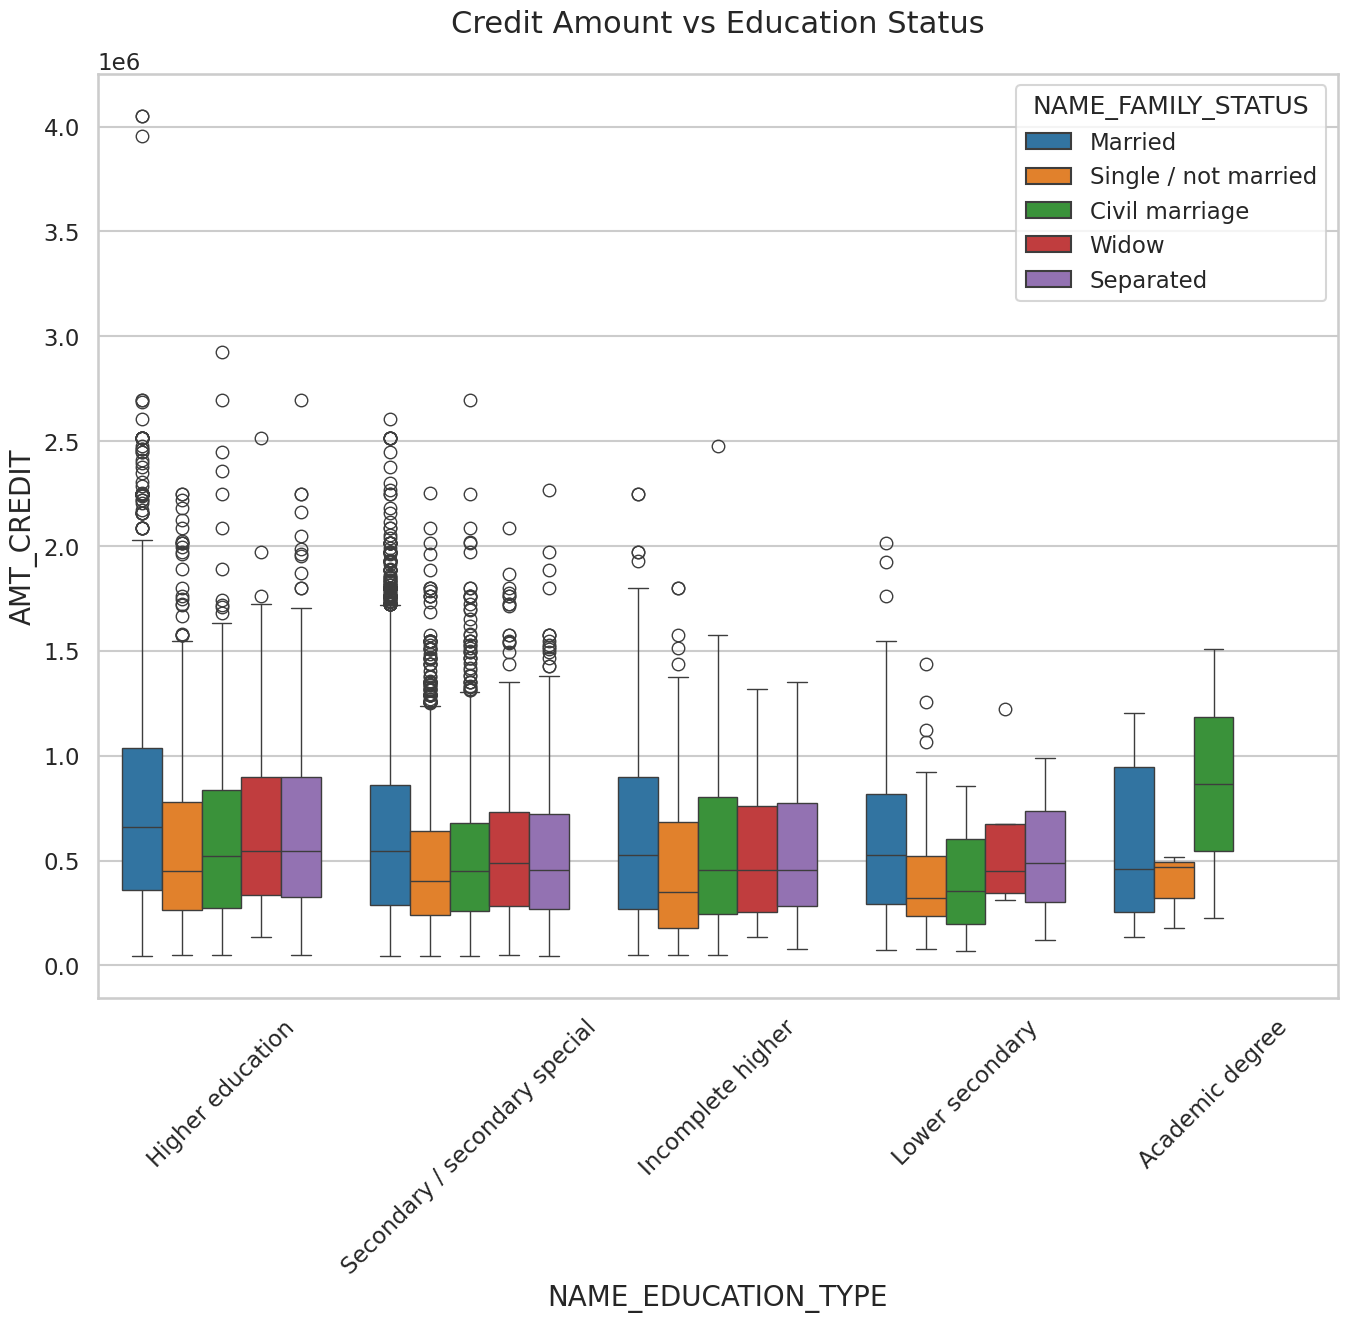

In [ ]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

# Box plotting for Income amount in logarithmic scale

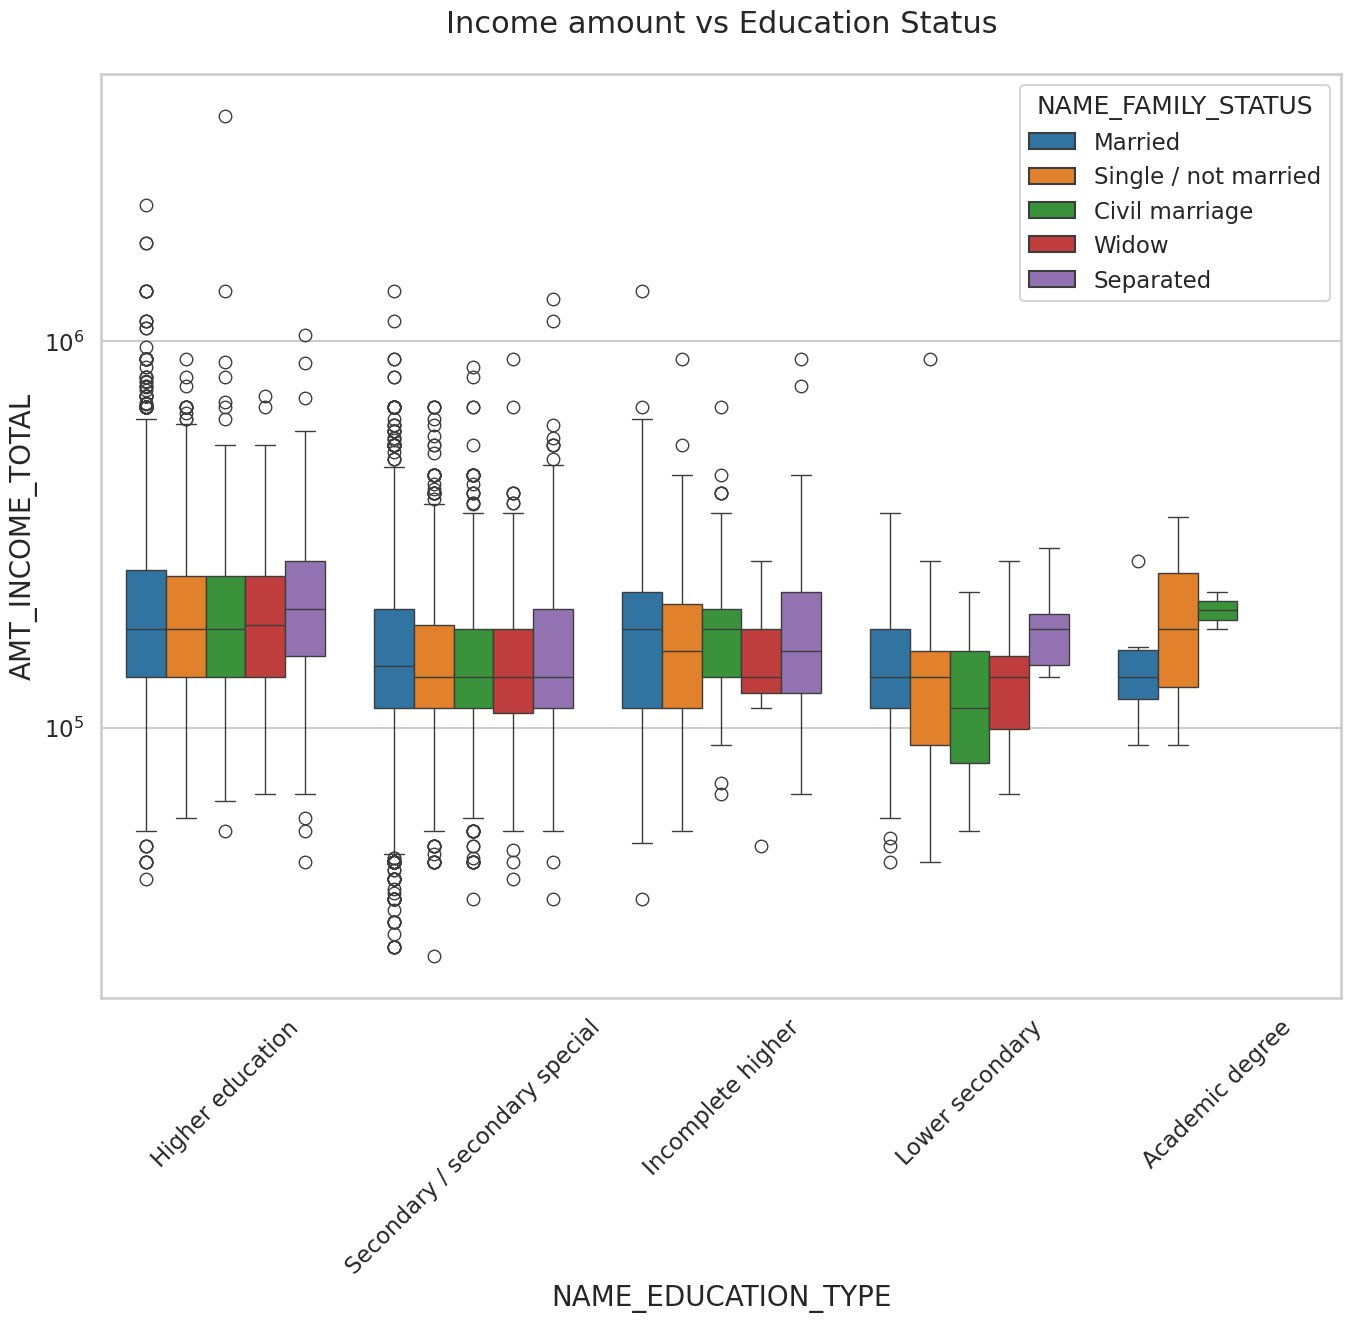

In [ ]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

# Reading the dataset of previous application

In [ ]:
df1=pd.read_csv("previous_application.csv")
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the missing data

# listing the null values columns having more than 40%

In [ ]:
emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.4*len(emptycol1))]
len(emptycol1)

14

# Removing those 15 columns

In [ ]:
emptycol1 = list(emptycol1[emptycol1.values>=0.4].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(29768, 23)

# Removing the column values of 'XNA' and 'XAP'

In [ ]:
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(1223, 23)

# Removing the column values of 'XNA' and 'XAP'


In [ ]:
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(1223, 23)

# Now merging the Application dataset with previous appliaction dataset

In [ ]:
new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes=('_x','_y'))

In [ ]:
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100594,0,Cash loans,F,N,Y,0,106398.0,360000.0,9900.0,...,HC,Repeater,XNA,Cash,walk-in,Channel of corporate sales,-1.0,XNA,low_normal,Cash Street: low
1,101302,0,Cash loans,M,Y,N,0,202500.0,305955.0,36441.0,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,middle,Cash Street: middle
2,101723,1,Cash loans,M,Y,Y,1,135000.0,447768.0,29920.5,...,SCO,Repeater,XNA,Cash,walk-in,Country-wide,50.0,Connectivity,high,Cash Street: high
3,101723,1,Cash loans,M,Y,Y,1,135000.0,447768.0,29920.5,...,SCO,Repeater,XNA,Cash,walk-in,Country-wide,50.0,Connectivity,high,Cash Street: high
4,101909,0,Cash loans,M,Y,N,0,157500.0,734773.5,24007.5,...,XAP,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,high,Cash Street: high


# Renaming the column names after merging

In [ ]:
new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

# Removing unwanted columns for analysis

In [ ]:
new_df1.drop(['SK_ID_CURR', 'REG_REGION_NOT_LIVE_REGION',
              'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
              'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)

# Distribution of contract status in logarithmic scale

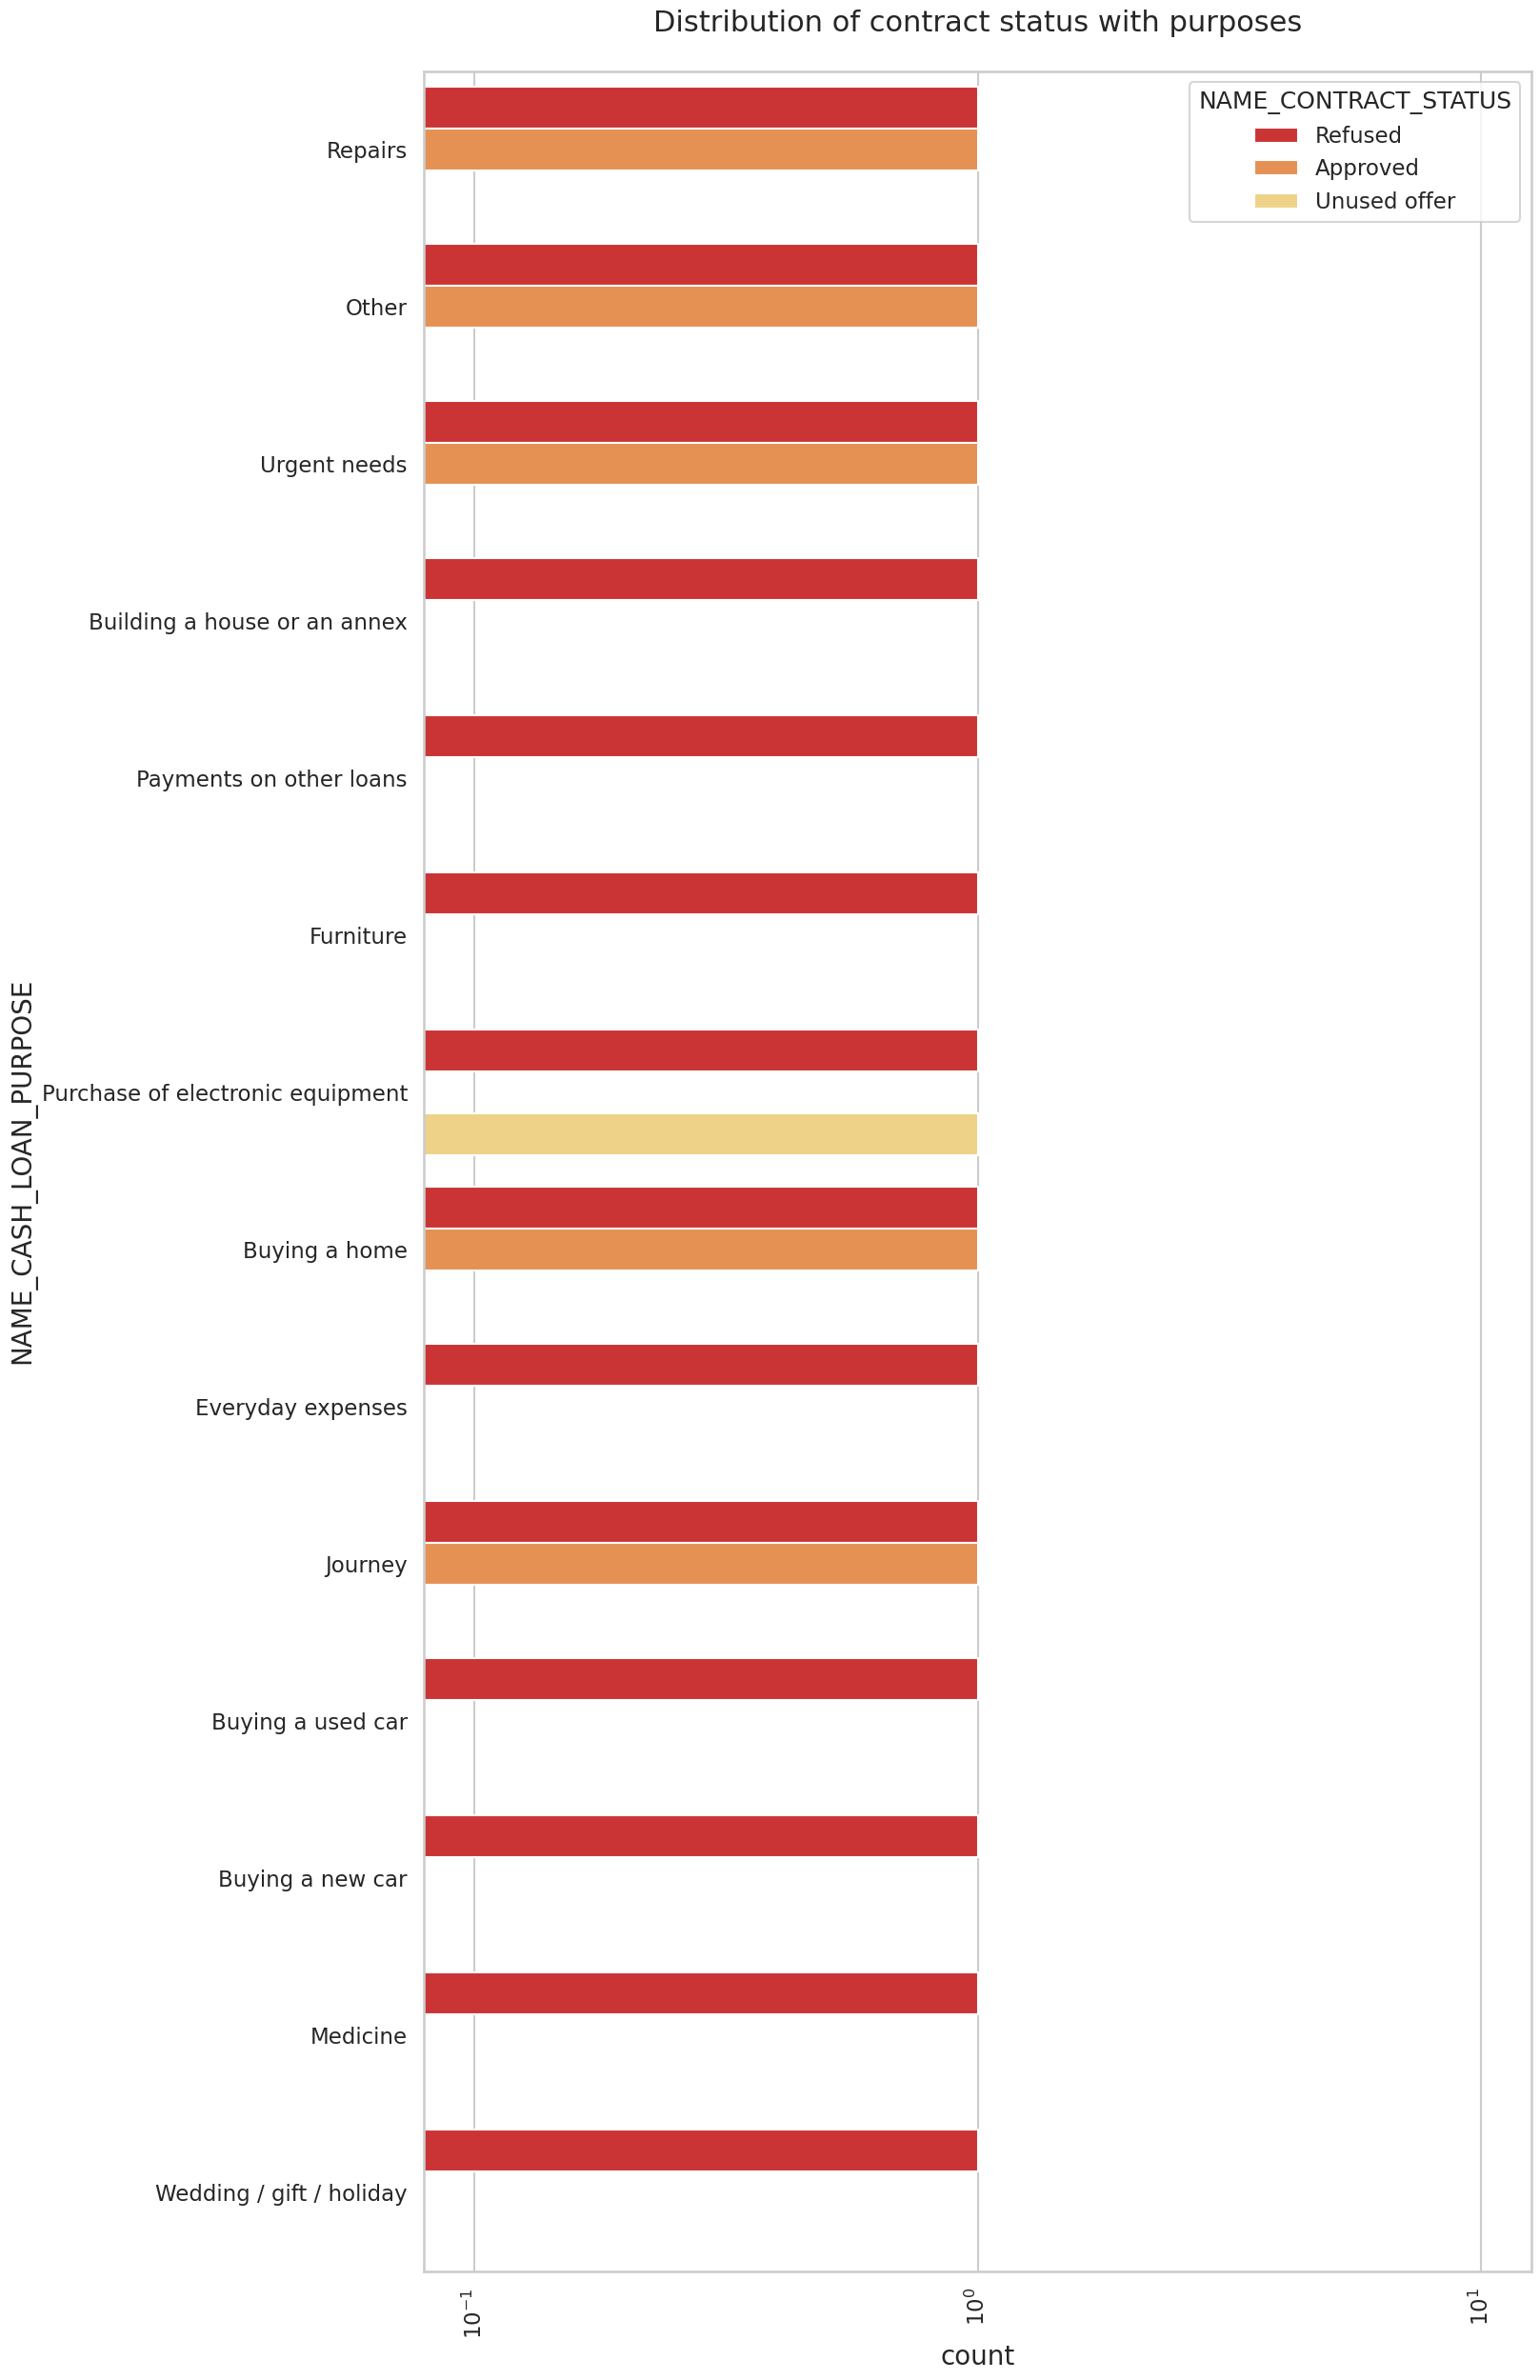

In [ ]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='YlOrRd_r')

# Distribution of contract status

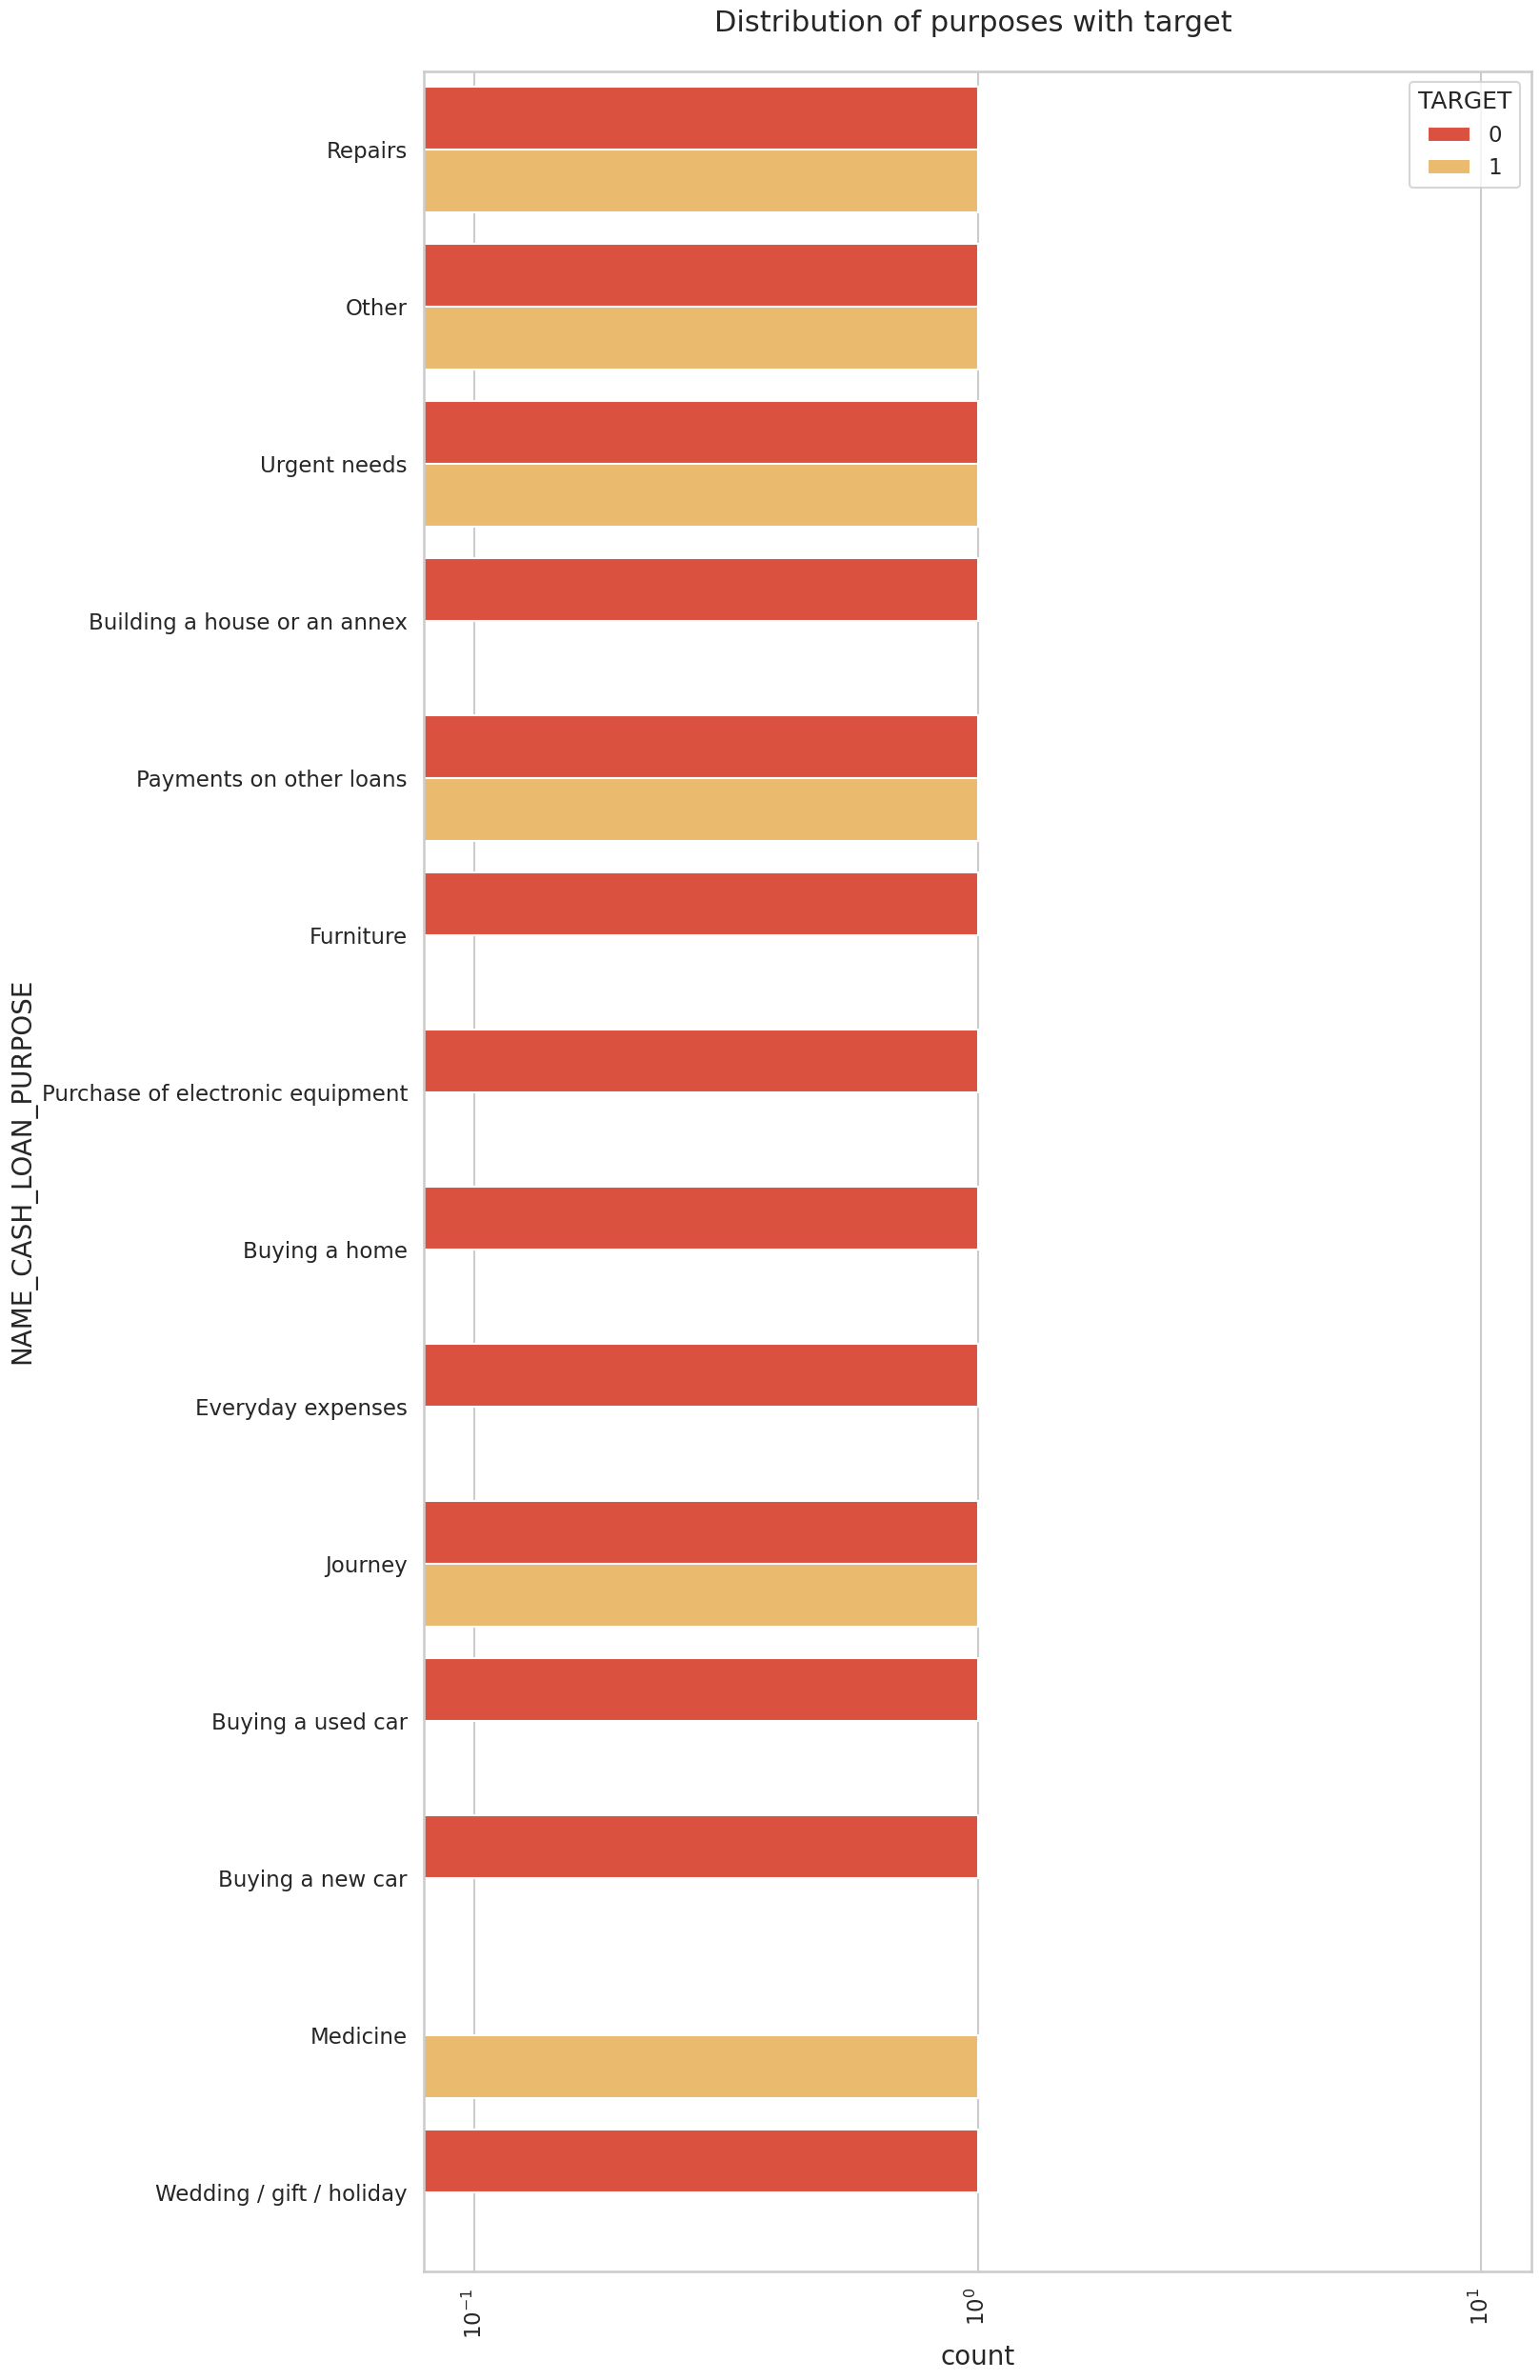

In [ ]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='YlOrRd_r')

# Box plotting for Credit amount in logarithmic scale

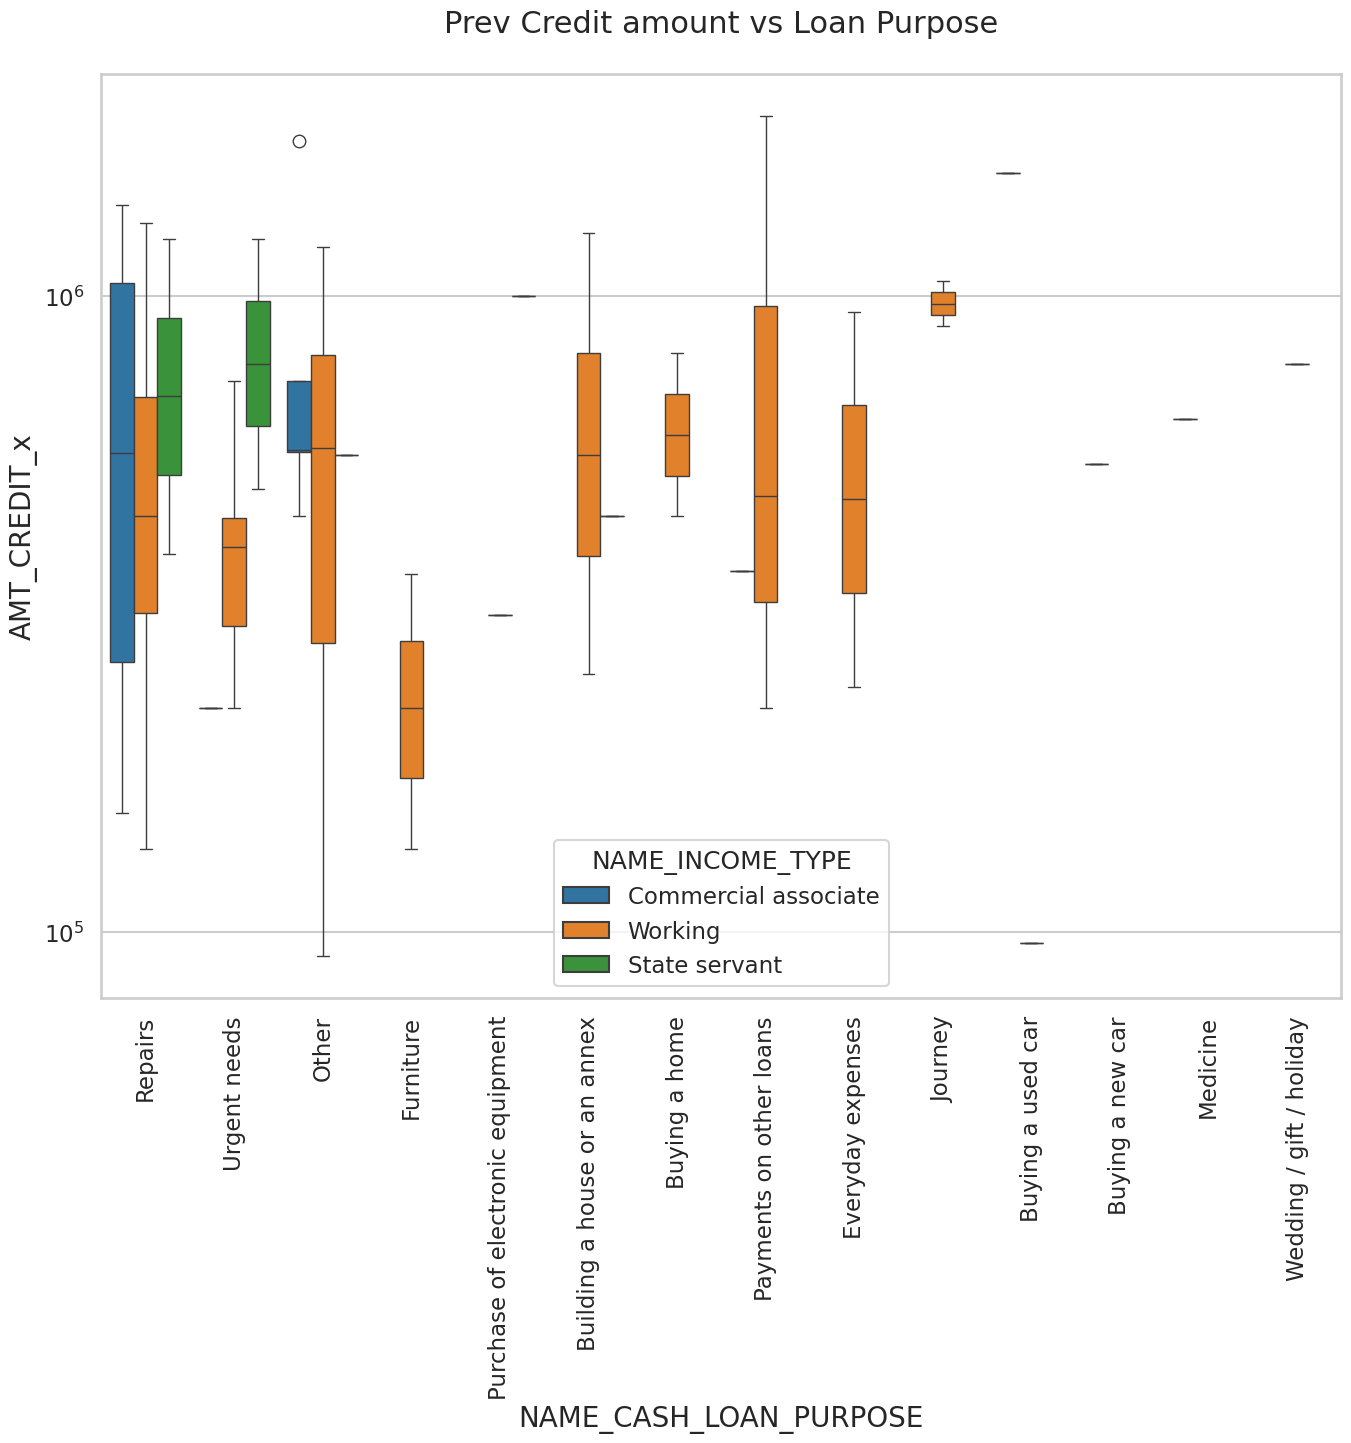

In [ ]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_x',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

# Box plotting for Credit amount prev vs Housing type in logarithmic scale

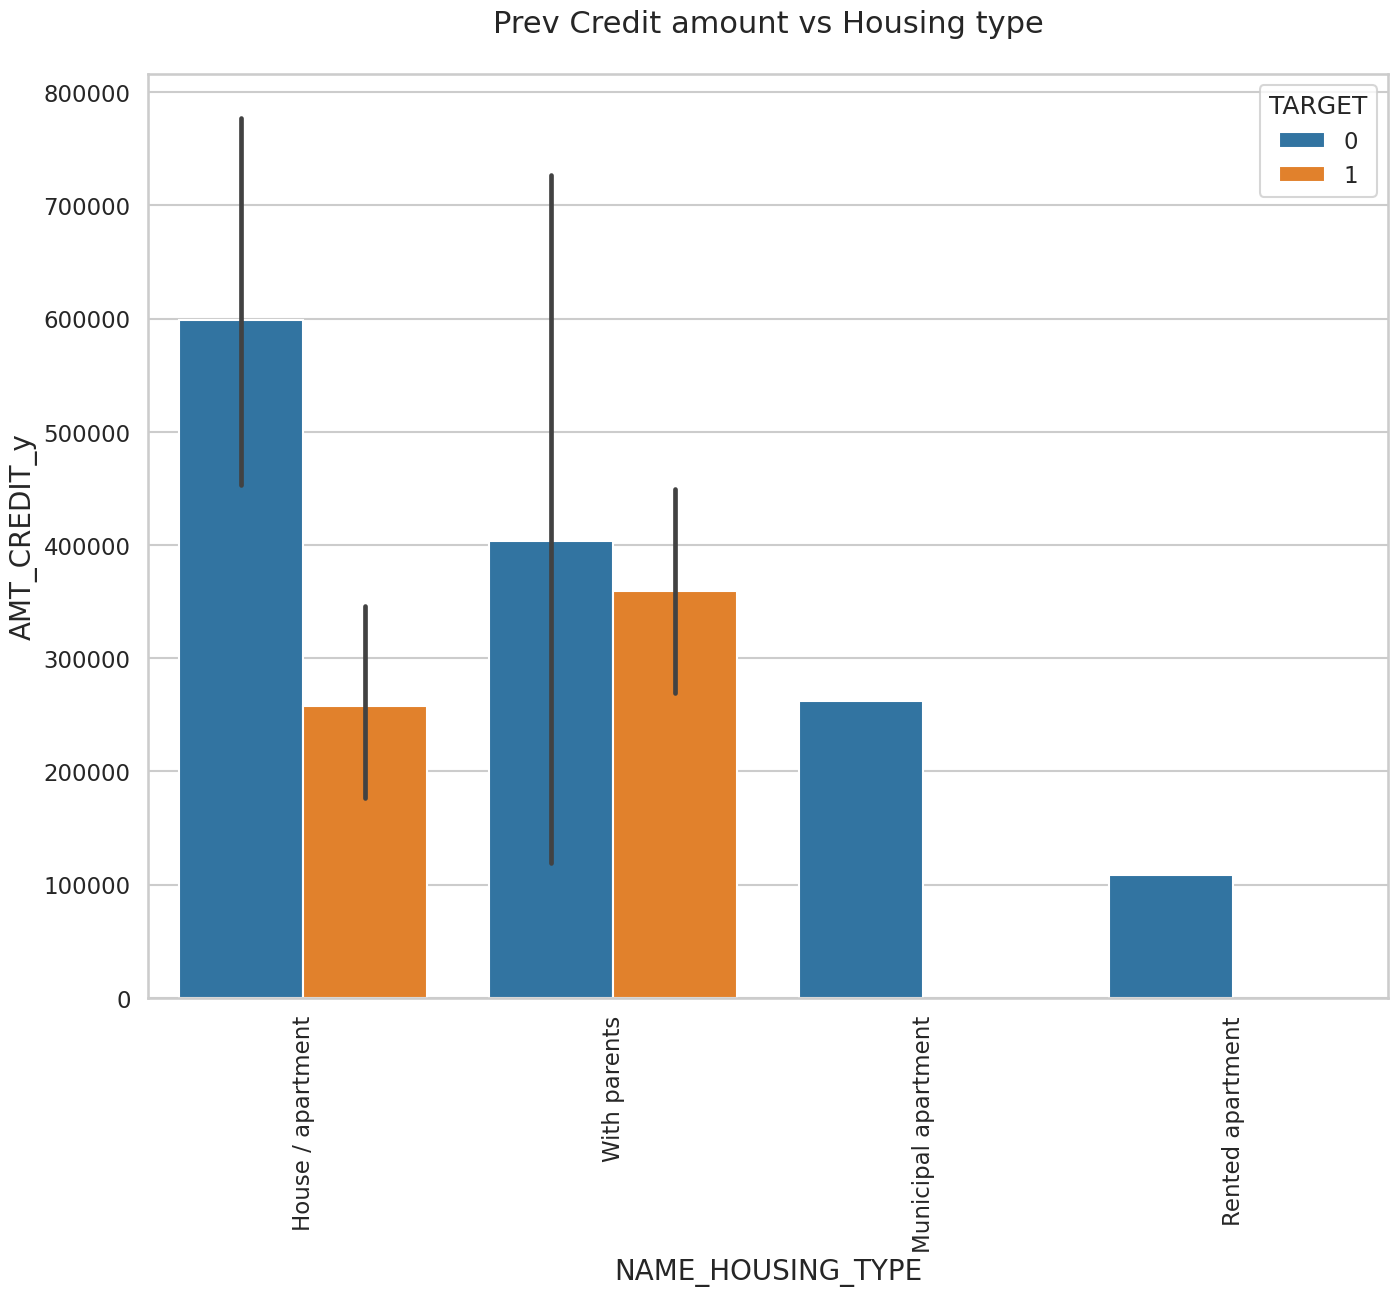

In [ ]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()